In [1]:
#Param√®tres Python et Pandas

import pandas as pd 
import numpy as np
import missingno as msno
from datetime import datetime


In [2]:
# Visualisation des graphiques 

import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, shapiro

In [3]:
# Calculs statistiques
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model


In [4]:
# P√©visions des mod√®les saisonniers
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from functions import*

In [5]:
# Mod√®les SARIMAX
from statsmodels.tsa.statespace.sarimax import*
from statsmodels.stats.diagnostic import acorr_ljungbox

In [6]:
conso_mensuelle = pd.read_excel(r"C:\Users\Utilisateur\projet 9\conso_mensuelle.xlsx", parse_dates=[0])
conso_mensuelle

Mois              Qualit√©        Territoire  Production totale  \
0    2012-01-01  Donn√©es d√©finitives            France              57177   
1    2012-02-01  Donn√©es d√©finitives            France              54419   
2    2012-03-01  Donn√©es d√©finitives            France              48583   
3    2012-04-01  Donn√©es d√©finitives            France              44192   
4    2012-05-01  Donn√©es d√©finitives            France              40433   
...         ...                  ...               ...                ...   
1333 2021-06-01  Donn√©es consolid√©es         Occitanie               2228   
1334 2021-06-01  Donn√©es consolid√©es         Normandie               6498   
1335 2021-06-01  Donn√©es consolid√©es   Hauts-de-France               3271   
1336 2021-06-01  Donn√©es consolid√©es              PACA               1697   
1337 2021-06-01  Donn√©es consolid√©es  Pays-de-la-Loire                225   

      Production nucl√©aire  Production thermique totale  \
0                  42811.0                         5399   
1                  38661.0                         8721   
2                  37549.0                         5276   
3                  33100.0                         3484   
4                  29058.0                         1772   
...                    ...                          ...   
1333                 897.0                            0   
1334                6215.0                          142   
1335                2347.0                          465   
1336                  57.0                          173   
1337                  41.0                           32   

      Production thermique charbon  Production thermique fioul  \
0                            741.0                         691   
1                           2511.0                        1309   
2                           1435.0                         666   
3                           1655.0                         486   
4                            854.0                         368   
...                            ...                         ...   
1333                         724.0                           0   
1334                           0.0                          19   
1335                           0.0                           0   
1336                          -1.0                          16   
1337                          21.0                           0   

      Production thermique gaz  Production hydraulique  ...  \
0                         3967                    6741  ...   
1                         4901                    5244  ...   
2                         3175                    3894  ...   
3                         1343                    5302  ...   
4                          549                    7706  ...   
...                        ...                     ...  ...   
1333                         0                     724  ...   
1334                       123                      10  ...   
1335                       465                       1  ...   
1336                       158                    1217  ...   
1337                        10                       1  ...   

      Production bio√©nergies  Consommation totale  Solde exportateur  \
0                        514                51086             5371.0   
1                        454                54476             -715.0   
2                        531                43156             4888.0   
3                        405                40176             3447.0   
4                        469                35257             4425.0   
...                      ...                  ...                ...   
1333                      39                 2567             -474.0   
1334                      58                 1877             4620.0   
1335                      77                 3456             -185.0   
1336                      57                 2940            -1249.0   
1337        

In [7]:
conso_mensuelle.columns

Index(['Mois', 'Qualit√©', 'Territoire', 'Production totale',
       'Production nucl√©aire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production √©olien', 'Production solaire', 'Production bio√©nergies',
       'Consommation totale', 'Solde exportateur', 'Echanges export',
       'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique'],
      dtype='object')

In [8]:
# Restriction du jeu de donn√©e
conso_france = conso_mensuelle[['Territoire','Mois','Consommation totale']]
conso_france

Territoire       Mois  Consommation totale
0               France 2012-01-01                51086
1               France 2012-02-01                54476
2               France 2012-03-01                43156
3               France 2012-04-01                40176
4               France 2012-05-01                35257
...                ...        ...                  ...
1333         Occitanie 2021-06-01                 2567
1334         Normandie 2021-06-01                 1877
1335   Hauts-de-France 2021-06-01                 3456
1336              PACA 2021-06-01                 2940
1337  Pays-de-la-Loire 2021-06-01                 1737

[1338 rows x 3 columns]

In [9]:
conso_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Territoire           1338 non-null   object        
 1   Mois                 1338 non-null   datetime64[ns]
 2   Consommation totale  1338 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 31.5+ KB


# Mision 0 : Traitement du jeu de donn√©e 

## La colonne territoire devient France

In [10]:
# Regroupe territoire √©gale France
Consommation = conso_france.loc[conso_france["Territoire"] == "France"]
Consommation = Consommation.rename(columns = {"Consommation totale": "Conso_total_observe"})
Consommation.head()

Territoire       Mois  Conso_total_observe
0     France 2012-01-01                51086
1     France 2012-02-01                54476
2     France 2012-03-01                43156
3     France 2012-04-01                40176
4     France 2012-05-01                35257

## Conversion de la date 

In [11]:
#Tout d'abord on convertit la date en format pouvant √™tre modifi√© avec la fonction to_datetime de pandas.
Consommation["Mois"] = pd.to_datetime(Consommation["Mois"])
Consommation

Territoire       Mois  Conso_total_observe
0        France 2012-01-01                51086
1        France 2012-02-01                54476
2        France 2012-03-01                43156
3        France 2012-04-01                40176
4        France 2012-05-01                35257
...         ...        ...                  ...
1279     France 2021-02-01                43024
1292     France 2021-03-01                43913
1305     France 2021-04-01                37747
1318     France 2021-05-01                35007
1331     France 2021-06-01                32032

[114 rows x 3 columns]

In [12]:
Consommation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 1331
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Territoire           114 non-null    object        
 1   Mois                 114 non-null    datetime64[ns]
 2   Conso_total_observe  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.6+ KB


## Visualisation des valeurs manquantes 

<AxesSubplot:>

<Figure size 432x432 with 0 Axes>

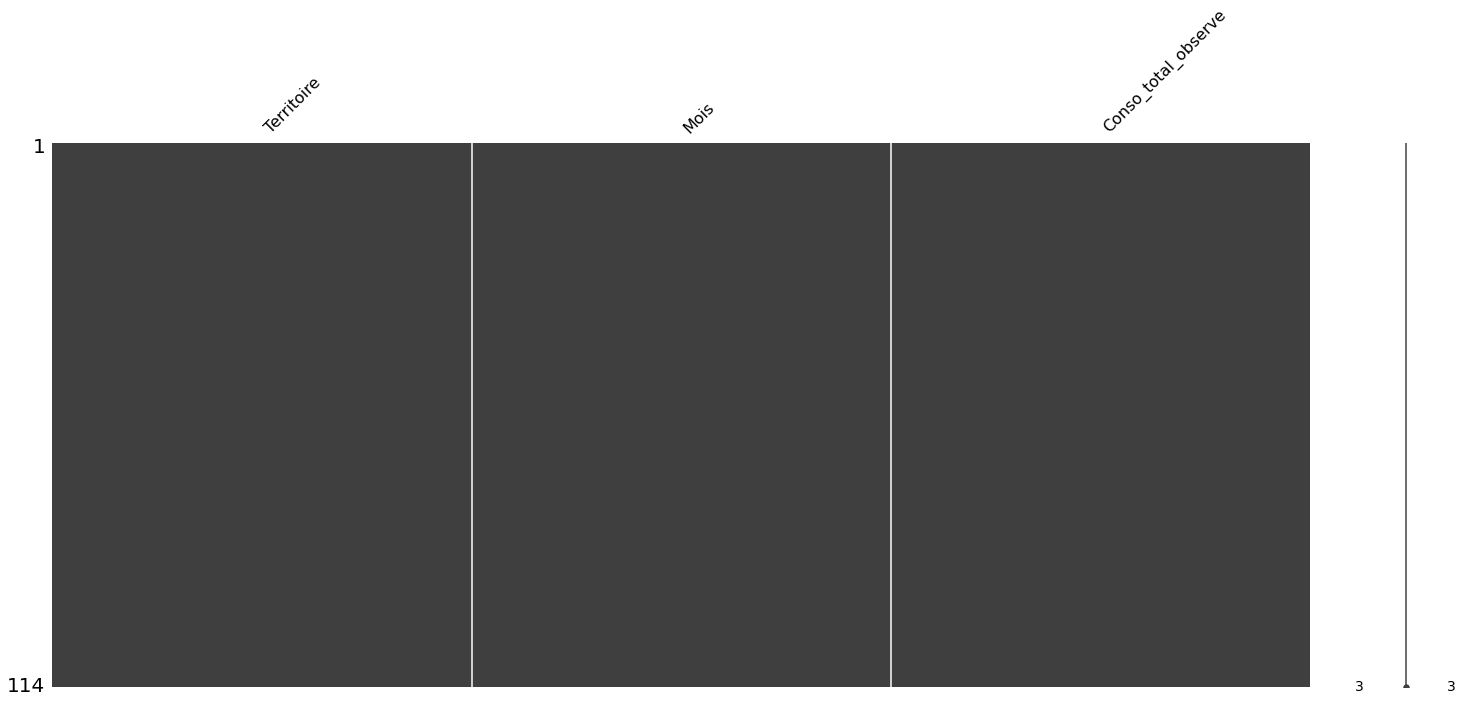

In [13]:
# On untilise missingno
plt.figure(figsize = (6,6))
msno.matrix(Consommation)

## Recherche des valeurs aberrantes 

In [14]:
aberrantes = Consommation.groupby(by = ["Mois"]).nunique()
aberrantes

Territoire  Conso_total_observe
Mois                                       
2012-01-01           1                    1
2012-02-01           1                    1
2012-03-01           1                    1
2012-04-01           1                    1
2012-05-01           1                    1
...                ...                  ...
2021-02-01           1                    1
2021-03-01           1                    1
2021-04-01           1                    1
2021-05-01           1                    1
2021-06-01           1                    1

[114 rows x 2 columns]

In [15]:
aberrantes.Territoire.unique()

array([1], dtype=int64)

## Recherche des doublons

In [16]:
Consommation.drop_duplicates()

Territoire       Mois  Conso_total_observe
0        France 2012-01-01                51086
1        France 2012-02-01                54476
2        France 2012-03-01                43156
3        France 2012-04-01                40176
4        France 2012-05-01                35257
...         ...        ...                  ...
1279     France 2021-02-01                43024
1292     France 2021-03-01                43913
1305     France 2021-04-01                37747
1318     France 2021-05-01                35007
1331     France 2021-06-01                32032

[114 rows x 3 columns]

## R√©sum√© du dataset 

In [17]:
Consommation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 1331
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Territoire           114 non-null    object        
 1   Mois                 114 non-null    datetime64[ns]
 2   Conso_total_observe  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.6+ KB


On a un jeu de donn√©es complet pour chaque variable avec 114 lignes et 3 colonnes, la date est bien au format date 

## Visualisation de la consommation

In [18]:
#Restriction du jeu de donn√©e
Consommation_mensuelle = Consommation[["Mois", "Conso_total_observe"]]
Consommation_mensuelle

Mois  Conso_total_observe
0    2012-01-01                51086
1    2012-02-01                54476
2    2012-03-01                43156
3    2012-04-01                40176
4    2012-05-01                35257
...         ...                  ...
1279 2021-02-01                43024
1292 2021-03-01                43913
1305 2021-04-01                37747
1318 2021-05-01                35007
1331 2021-06-01                32032

[114 rows x 2 columns]

In [19]:
Consommation_mensuelle.tail()

Mois  Conso_total_observe
1279 2021-02-01                43024
1292 2021-03-01                43913
1305 2021-04-01                37747
1318 2021-05-01                35007
1331 2021-06-01                32032

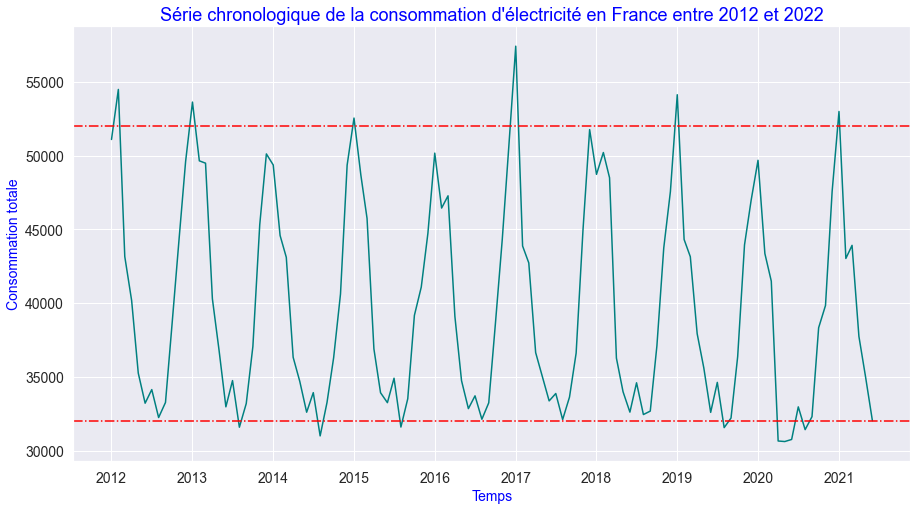

In [20]:
sns.set(style = "darkgrid")
plt.figure(figsize = (15,8))

# Variables de la figure
x = Consommation_mensuelle["Mois"]
y = Consommation_mensuelle["Conso_total_observe"]


# M√©tadonn√©es
plt.title("S√©rie chronologique de la consommation d'√©lectricit√© en France entre 2012 et 2022", fontsize = 18, color = "blue")
plt.ylabel("Consommation totale", fontsize = 14, color = "blue")
plt.xlabel("Temps", fontsize = 14, color = "blue")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Sauvegarder la figure 
plt.savefig("Conso_mensuelle.png")
plt.plot(x,y, color = "teal")
plt.axhline(52000, linestyle = "dashdot", color = "red")
plt.axhline(32000, linestyle = "dashdot", color = "red")

# Mission 1

## D√©gre Jour Unifi√© Chauffage (DJU)

In [21]:
chauffage_mensuel = pd.read_excel(r"C:\Users\Utilisateur\projet 9\DJU_chauffage.xlsx", skiprows=11)
chauffage_mensuel = chauffage_mensuel.rename(columns = {"Unnamed: 0" :  "Annee"})
chauffage_mensuel

Annee    JAN    F√âV    MAR    AVR    MAI   JUN   JUI   AO√õ   SEP    OCT  \
0   2021  396.7  302.8  271.0  228.3  138.3   1.4   0.0   0.0   0.0    0.0   
1   2020  339.0  249.6  268.6   81.4   65.7  20.6   0.9   4.5  34.3  157.5   
2   2019  404.9  268.3  233.1  168.5  117.9  24.4   0.0   1.7  26.7  133.7   
3   2018  303.4  432.6  314.3  119.7   55.9   8.1   0.0   3.3  34.3  122.4   
4   2017  467.9  278.4  206.1  182.6   75.0   9.4   1.0   6.8  62.6   99.4   
5   2016  364.4  321.6  321.1  212.1   88.1  27.5   5.7   3.2  11.7  176.0   
6   2015  392.0  365.7  275.5  141.1   91.5  15.8   6.9   6.1  71.9  176.9   
7   2014  324.4  281.9  223.9  135.5  100.2  19.1   8.3  19.3  16.0   92.3   
8   2013  429.2  402.2  376.6  209.5  158.4  43.6   0.6   5.0  41.5  105.0   
9   2012  336.0  435.9  201.9  230.3   83.3  35.0  12.4   2.4  58.0  154.6   

     NOV    D√âC   Total  
0    0.0    0.0  1338.2  
1  227.2  336.8  1785.9  
2  282.6  327.3  1989.0  
3  282.5  325.9  2002.2  
4  282.6  369.0  2040.6  
5  285.6  390.8  2207.3  
6  195.0  248.1  1986.2  
7  222.6  368.2  1811.5  
8  303.9  349.5  2424.8  
9  296.2  345.9  2191.5

In [22]:
# Renommer les colonnes  
# Ici les mois on les prend en tant que string

chauffage_mensuel = chauffage_mensuel.rename(columns ={"JAN":"1",
                                                   "F√âV" : "2",
                                                   "MAR" : "3",
                                                   "AVR" : "4",
                                                   "MAI" : "5",
                                                   "JUN" :"6",
                                                   "JUI" : "7",
                                                   "AO√õ" : "8",
                                                   "SEP" : "9",
                                                   "OCT" : "10",
                                                   "NOV" : "11",
                                                   "D√âC" : "12"})

# On supprime la colonne total
#chauffage_mensuel = chauffage_mensuel.drop(columns = ["Total"], axis = 1)
chauffage_mensuel

Annee      1      2      3      4      5     6     7     8     9     10  \
0   2021  396.7  302.8  271.0  228.3  138.3   1.4   0.0   0.0   0.0    0.0   
1   2020  339.0  249.6  268.6   81.4   65.7  20.6   0.9   4.5  34.3  157.5   
2   2019  404.9  268.3  233.1  168.5  117.9  24.4   0.0   1.7  26.7  133.7   
3   2018  303.4  432.6  314.3  119.7   55.9   8.1   0.0   3.3  34.3  122.4   
4   2017  467.9  278.4  206.1  182.6   75.0   9.4   1.0   6.8  62.6   99.4   
5   2016  364.4  321.6  321.1  212.1   88.1  27.5   5.7   3.2  11.7  176.0   
6   2015  392.0  365.7  275.5  141.1   91.5  15.8   6.9   6.1  71.9  176.9   
7   2014  324.4  281.9  223.9  135.5  100.2  19.1   8.3  19.3  16.0   92.3   
8   2013  429.2  402.2  376.6  209.5  158.4  43.6   0.6   5.0  41.5  105.0   
9   2012  336.0  435.9  201.9  230.3   83.3  35.0  12.4   2.4  58.0  154.6   

      11     12   Total  
0    0.0    0.0  1338.2  
1  227.2  336.8  1785.9  
2  282.6  327.3  1989.0  
3  282.5  325.9  2002.2  
4  282.6  369.0  2040.6  
5  285.6  390.8  2207.3  
6  195.0  248.1  1986.2  
7  222.6  368.2  1811.5  
8  303.9  349.5  2424.8  
9  296.2  345.9  2191.5

In [23]:
# Nous allons d√©pivot√© les colonnes mois afin de cr√©er une seule colonne mois
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html


chauffage_mensuel = pd.melt(chauffage_mensuel, id_vars=['Annee'], 
                            value_vars = ["1","2","3","4","5","6","7","8","9","10","11","12"] ,
                            var_name = 'Mois', value_name = 'DJU')
                                                    


chauffage_mensuel

Annee Mois    DJU
0     2021    1  396.7
1     2020    1  339.0
2     2019    1  404.9
3     2018    1  303.4
4     2017    1  467.9
..     ...  ...    ...
115   2016   12  390.8
116   2015   12  248.1
117   2014   12  368.2
118   2013   12  349.5
119   2012   12  345.9

[120 rows x 3 columns]

In [24]:
# https://qastack.fr/programming/17978092/combine-date-and-time-columns-using-python-pandas

# On converti  les colonnes en m√™me types ici en str pour utiliser la fonction to_datetime:
# NB: to_datetime ne fonctionne qu'avec des variables de m√™me type

chauffage_mensuel["date"] = pd.to_datetime(chauffage_mensuel.Annee.astype(str)+' '
                                           +chauffage_mensuel.Mois.astype(str))
                                           
chauffage_mensuel

Annee Mois    DJU       date
0     2021    1  396.7 2021-01-01
1     2020    1  339.0 2020-01-01
2     2019    1  404.9 2019-01-01
3     2018    1  303.4 2018-01-01
4     2017    1  467.9 2017-01-01
..     ...  ...    ...        ...
115   2016   12  390.8 2016-12-01
116   2015   12  248.1 2015-12-01
117   2014   12  368.2 2014-12-01
118   2013   12  349.5 2013-12-01
119   2012   12  345.9 2012-12-01

[120 rows x 4 columns]

Ici la date est au format datetime

In [25]:
#On r√©cup√®re les variables qui nous int√©r√®sse 
chauffage_ms = chauffage_mensuel[["date", "DJU"]]
chauffage_ms = chauffage_ms.rename(columns = {"date" : "Mois"})
chauffage_ms =  chauffage_ms.sort_values(by = "Mois")
chauffage_ms

Mois    DJU
9   2012-01-01  336.0
19  2012-02-01  435.9
29  2012-03-01  201.9
39  2012-04-01  230.3
49  2012-05-01   83.3
..         ...    ...
70  2021-08-01    0.0
80  2021-09-01    0.0
90  2021-10-01    0.0
100 2021-11-01    0.0
110 2021-12-01    0.0

[120 rows x 2 columns]

In [26]:
chauffage_ms.tail(7)

Mois  DJU
50  2021-06-01  1.4
60  2021-07-01  0.0
70  2021-08-01  0.0
80  2021-09-01  0.0
90  2021-10-01  0.0
100 2021-11-01  0.0
110 2021-12-01  0.0

In [27]:
chauffage_ms.to_excel("chauffage_ms.xlsx", index = False)

In [28]:
chauffage_mois = pd.read_excel(r"C:\Users\Utilisateur\projet 9\chauffage_ms.xlsx")
chauffage_mois.tail()

Mois  DJU
115 2021-08-01  0.0
116 2021-09-01  0.0
117 2021-10-01  0.0
118 2021-11-01  0.0
119 2021-12-01  0.0

<AxesSubplot:>

<Figure size 216x216 with 0 Axes>

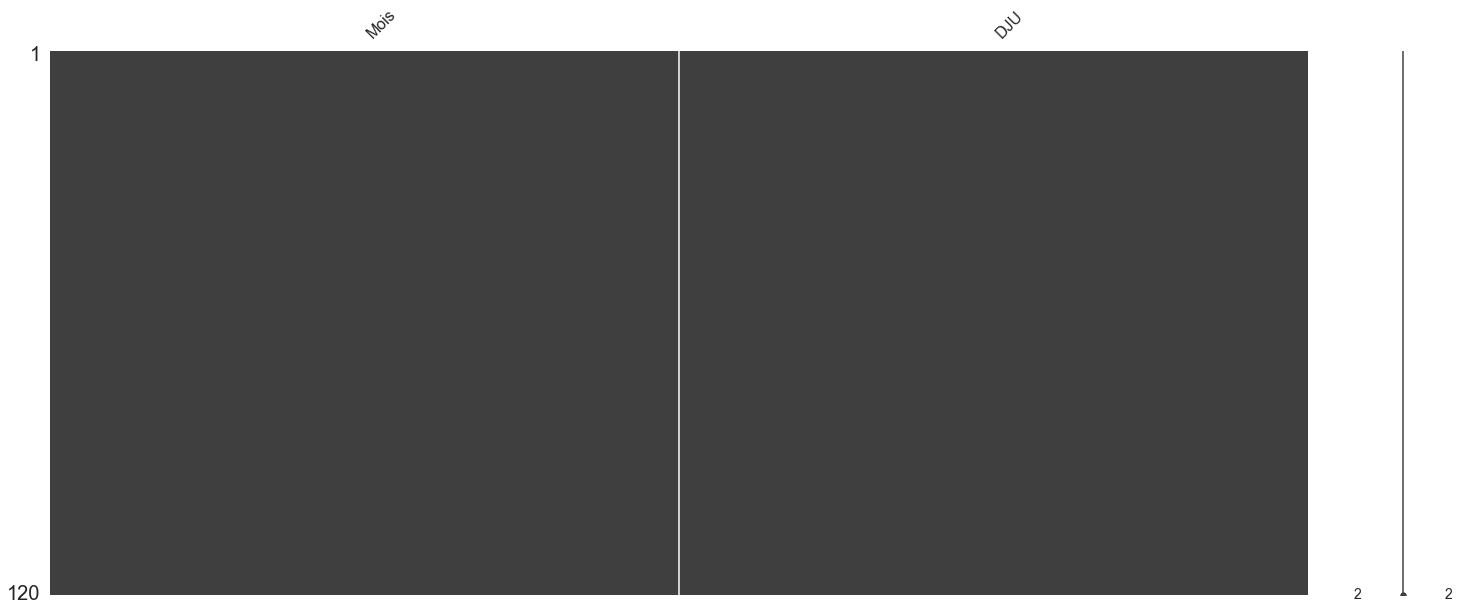

In [29]:
# On untilise missingno
plt.figure(figsize = (3,3))
msno.matrix(chauffage_mois)

Nous allons visualiser l'effet  du chauffage sur la consommation d'√©lectricit√© pour cela nous allons supperposer les courbes chauffage et consommation √©lectrique 

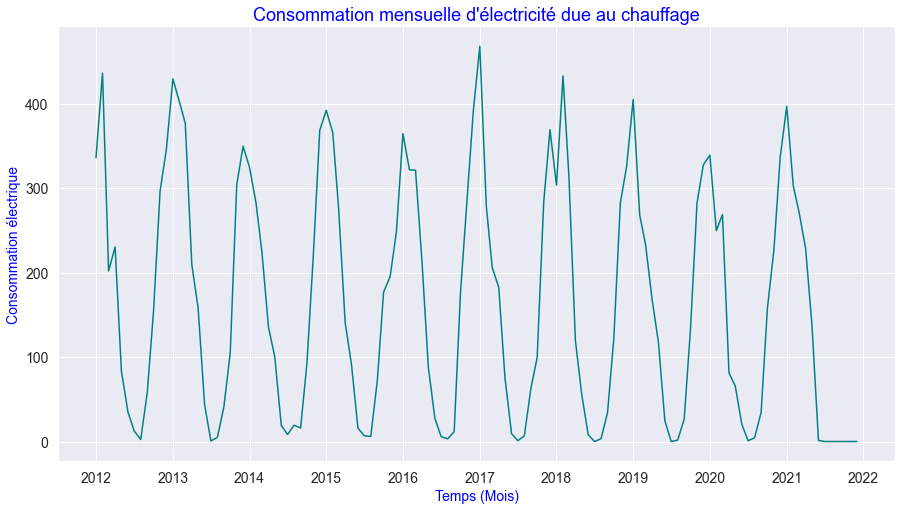

In [30]:
sns.set(style = "darkgrid")
plt.figure(figsize = (15,8))

# Variables de la figure
x = chauffage_mois["Mois"]
y = chauffage_mois["DJU"]


# M√©tadonn√©es
plt.title("Consommation mensuelle d'√©lectricit√© due au chauffage", fontsize = 18, color = "blue")
plt.ylabel("Consommation √©lectrique", fontsize = 14, color = "blue")
plt.xlabel("Temps (Mois)", fontsize = 14, color = "blue")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



# Sauvegarder la figure 
plt.savefig("Conso_mensuelle_dju.png")
plt.plot(x,y, color = "teal")

## Effet du chauffage sur la consommation √©lectrique

In [31]:
electricite_chauffage = pd.merge(Consommation_mensuelle, chauffage_mois, right_on = "Mois", left_on = "Mois")
electricite_chauffage.set_index("Mois", inplace = True)
electricite_chauffage = electricite_chauffage.sort_values(by = "Mois")
electricite_chauffage

Conso_total_observe    DJU
Mois                                  
2012-01-01                51086  336.0
2012-02-01                54476  435.9
2012-03-01                43156  201.9
2012-04-01                40176  230.3
2012-05-01                35257   83.3
...                         ...    ...
2021-02-01                43024  302.8
2021-03-01                43913  271.0
2021-04-01                37747  228.3
2021-05-01                35007  138.3
2021-06-01                32032    1.4

[114 rows x 2 columns]

In [32]:
electricite_chauffage.tail(7)

Conso_total_observe    DJU
Mois                                  
2020-12-01                47565  336.8
2021-01-01                52983  396.7
2021-02-01                43024  302.8
2021-03-01                43913  271.0
2021-04-01                37747  228.3
2021-05-01                35007  138.3
2021-06-01                32032    1.4

<AxesSubplot:>

<Figure size 216x216 with 0 Axes>

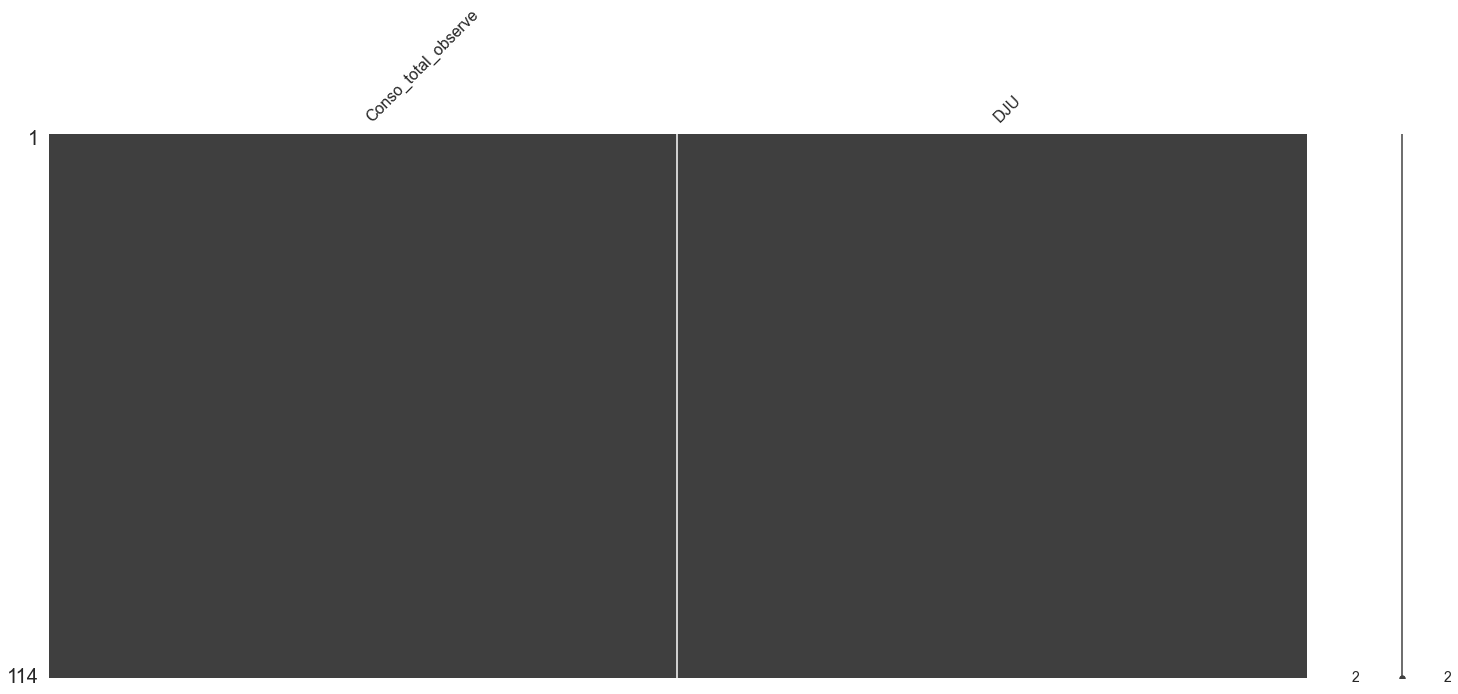

In [33]:
# On untilise missingno
plt.figure(figsize = (3,3))
msno.matrix(electricite_chauffage)

In [34]:
#Pour ajouter un deuxi√®me axe dans un graph
# https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

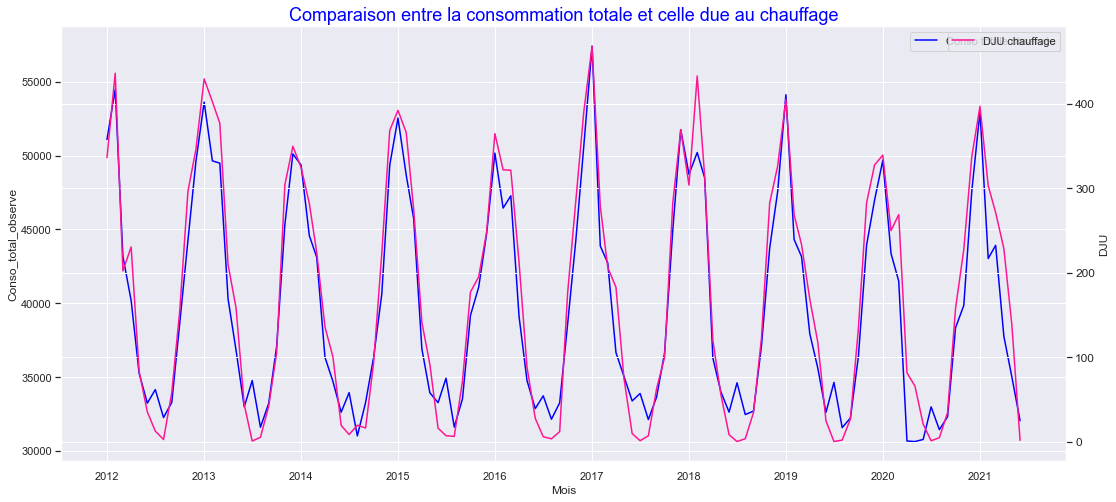

In [35]:
plt.figure(figsize=(18,8))

ax1 = sns.lineplot(data = electricite_chauffage,   
                      x = electricite_chauffage.index, 
                      y = "Conso_total_observe", 
                  color = "blue",
                  label = "Conso totale observ√©e")

ax2 = plt.twinx() # permet de consid√©rer l'axe des X comme √©tant commun


ax2 = sns.lineplot(data = electricite_chauffage,
                      x = electricite_chauffage.index, 
                       y= "DJU", 
                   color="deeppink", 
                     ax = ax2, 
                   label="DJU chauffage")
                                               


# M√©tadonn√©es
plt.title("Comparaison entre la consommation totale et celle due au chauffage", fontsize = 18, color = "blue")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 12, rotation =45)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

## Corrigez les donn√©es de consommation avec la r√©gr√©ssion lin√©aire

In [36]:
import statsmodels.formula.api as smf


### Entra√Ænement du mod√®le de la r√©gression lin√©aire 

### Visualisez de la droite de r√©gression

In [37]:
from sklearn import linear_model


[]

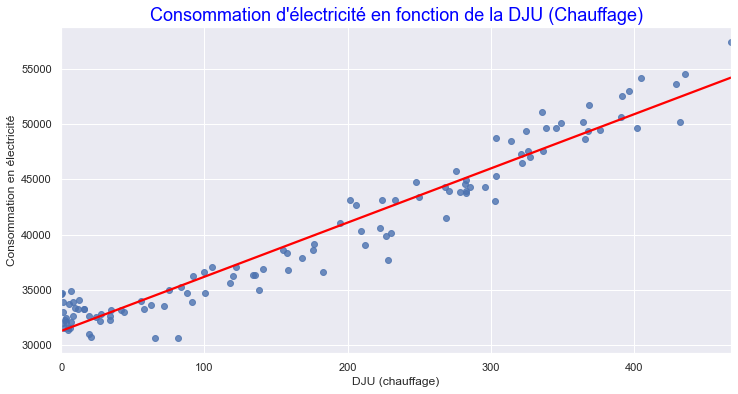

In [38]:
# Param√®tres  de la figure
sns.set(style = "darkgrid")
plt.figure(figsize = (12,6))

# Donn√©es pour tracer la figure
ax = sns.regplot(x = "DJU",
                 y = "Conso_total_observe", 
                 data = electricite_chauffage,
                 ci = None, 
                 line_kws = {"color" : "red"} )
# M√©tadonn√©es 
ax.set(xlabel = "DJU (chauffage)",
       ylabel = "Consommation en √©lectricit√©")
plt.title("Consommation d'√©lectricit√© en fonction de la DJU (Chauffage)", 
          fontsize = 18,
          color = "blue")

# Sauvegarde la la figure 
plt.savefig("droite_regression_conso.png")

plt.plot()

#### Calcul de la pente et de l'ordonn√©e √† l'origine

In [39]:
# Cr√©ation des donn√©es d'entra√Ænement 
X = np.matrix([np.ones(electricite_chauffage.shape[0]), electricite_chauffage['DJU']]).T
X[:10]

matrix([[  1. , 336. ],
        [  1. , 435.9],
        [  1. , 201.9],
        [  1. , 230.3],
        [  1. ,  83.3],
        [  1. ,  35. ],
        [  1. ,  12.4],
        [  1. ,   2.4],
        [  1. ,  58. ],
        [  1. , 154.6]])

In [40]:
Y = np.matrix(electricite_chauffage['Conso_total_observe']).T
Y[:10]

matrix([[51086],
        [54476],
        [43156],
        [40176],
        [35257],
        [33219],
        [34141],
        [32247],
        [33269],
        [38628]], dtype=int64)

In [41]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
theta

matrix([[31309.39597599],
        [   48.89118488]])

### R√©alisez une r√©gression lin√©aire simple

In [42]:
reg_simp = smf.ols('Conso_total_observe ~ DJU', data = electricite_chauffage).fit()
print(reg_simp.summary())

                             OLS Regression Results                            
Dep. Variable:     Conso_total_observe   R-squared:                       0.940
Model:                             OLS   Adj. R-squared:                  0.940
Method:                  Least Squares   F-statistic:                     1766.
Date:                 Mon, 07 Feb 2022   Prob (F-statistic):           2.07e-70
Time:                         16:41:35   Log-Likelihood:                -1011.1
No. Observations:                  114   AIC:                             2026.
Df Residuals:                      112   BIC:                             2032.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.131e+04    259.207    120.78

In [43]:
# On d√©termine les param√®tre a et b  avec la fonction params
#a = Intercept   coefficient directeur de la droite 
#b = DJU   pente     
a, b = reg_simp.params
print( a, b)

31309.395975992033 48.891184882400594


### V√©rification de la performance du mod√®le de r√©gression lin√©aire

#### On cr√©e la variable contenant les valeurs ajust√©es

In [44]:
# On cr√©e une variable contenant les donn√©es ajust√©es
#Conso_total_observe_ajuste = Conso_ajuste_reg_lineaire
electricite_chauffage["Conso_ajuste_reg_lineaire"] = reg_simp.predict() # On ajoute au data la colonne ajust√©e
electricite_chauffage

Conso_total_observe    DJU  Conso_ajuste_reg_lineaire
Mois                                                             
2012-01-01                51086  336.0               47736.834096
2012-02-01                54476  435.9               52621.063466
2012-03-01                43156  201.9               41180.526204
2012-04-01                40176  230.3               42569.035854
2012-05-01                35257   83.3               35382.031677
...                         ...    ...                        ...
2021-02-01                43024  302.8               46113.646758
2021-03-01                43913  271.0               44558.907079
2021-04-01                37747  228.3               42471.253485
2021-05-01                35007  138.3               38071.046845
2021-06-01                32032    1.4               31377.843635

[114 rows x 3 columns]

#### Visualisation de la droite de r√©gression des valeurs ajust√©e

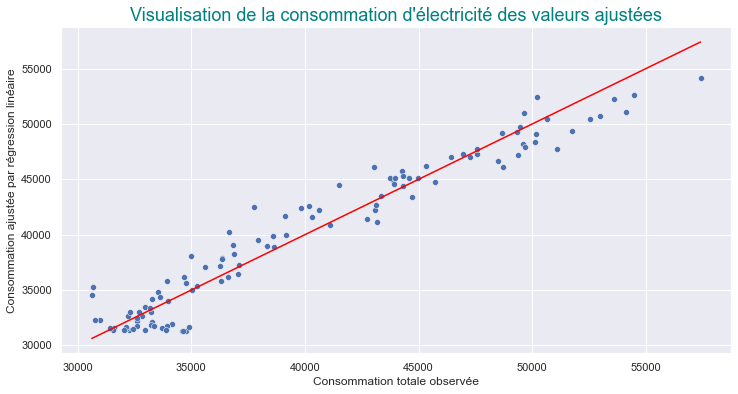

In [45]:
# On s√©lectionne l'√©tendue de notre figure
x_plot = [electricite_chauffage["Conso_total_observe"].min(), electricite_chauffage["Conso_total_observe"].max()]

# Param√®tres de la figure
sns.set(style = "darkgrid")
plt.figure(figsize = (12,6))

# Donn√©es de la figure

ax = sns.scatterplot(x = "Conso_total_observe", 
                     y = "Conso_ajuste_reg_lineaire",
                  data = electricite_chauffage)

# M√©tadonn√©es
ax.set(xlabel = "Consommation totale observ√©e", 
       ylabel = "Consommation ajust√©e par r√©gression lin√©aire")

plt.title("Visualisation de la consommation d'√©lectricit√© des valeurs ajust√©es",
          fontsize = 18, 
          color = "teal")

plt.plot (x_plot, x_plot, color = "red")

# Sauvegarder la figure 
plt.savefig("Conso_mensuelle_ajustee.png")
plt.show()

#

#### Repr√©senter les r√©sidus du mod√®le epsilon 

##### Droite d'Henry

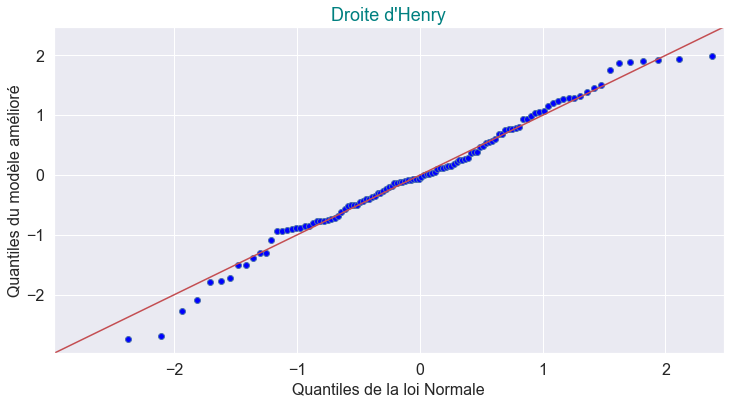

In [46]:
# Droite de Henry

# param√®tre de la figure
fig, ax  = plt.subplots(figsize=(12,6))

# Donn√©es de la figure
sm.qqplot(reg_simp.resid,
          line='45', 
          fit=True, 
          ax = ax)

# M√©tadonn√©es
plt.ylabel("Quantiles du mod√®le am√©lior√©", fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Quantiles de la loi Normale", fontsize=16)
plt.xticks(fontsize=16)
plt.title("Droite d'Henry", fontsize = 18, color = "teal")


plt.savefig('Droite_henry.png')
plt.show()

##### Courbe de distribution

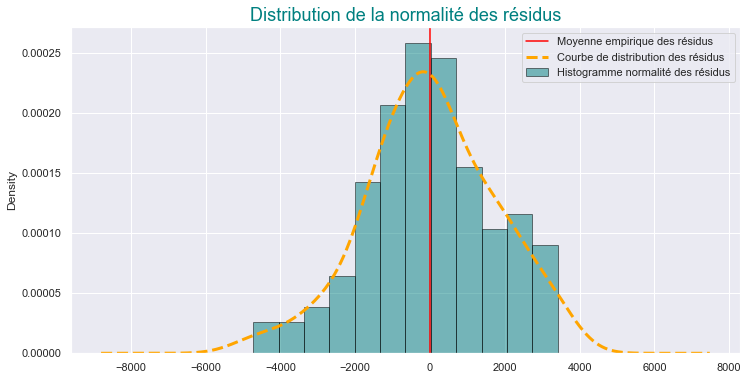

In [47]:
# Param√®tres de la figure 
fig = plt.figure(figsize=(12,6))

#Param√®tres de la figure

#ax = sns.distplot(reg_simp.resid, fit=stats.norm) # param√®tre obsol√®tte
# Histogramme
reg_simp.resid.plot(kind = 'hist',
                    bins = 12, 
                 density = True, 
                   alpha = 0.5, 
               edgecolor = 'black',
                   color = 'teal', 
                   label = "Histogramme normalit√© des r√©sidus")

# Ajout de la moyenne empirique sur l'histogramme
plt.axvline((np.mean(reg_simp.resid)), 
            color = 'red', 
            label = 'Moyenne empirique des r√©sidus')

# Ajout de la courbe de distribution
reg_simp.resid.plot(kind ='kde', 
                   color = 'orange', 
                   label = 'Courbe de distribution des r√©sidus',
               linestyle = 'dashed', lw = 3)

# M√©tadonn√©es

plt.title("Distribution de la normalit√© des r√©sidus", fontsize=18, color = "teal")

plt.savefig('Normalit√© des r√©sidus.png')

plt.legend()

plt.show()

##### Test de Shapiro-Wilk

Hypoth√®se nulle : les donn√©es proviennent de la distribution normale; ie pvalue > 5%

In [48]:
w, pvalue = stats.shapiro(reg_simp.resid)
print(w, pvalue)

0.9853870272636414 0.25306108593940735


In [49]:
# Calcul de la consommation ajust√©e par regression lin√©aire
#conso_sans_chauffage = Conso_ajustee
electricite_chauffage["conso_ajustee"] = electricite_chauffage["Conso_total_observe"] - b * electricite_chauffage["DJU"]
electricite_chauffage

Conso_total_observe    DJU  Conso_ajuste_reg_lineaire  \
Mois                                                                
2012-01-01                51086  336.0               47736.834096   
2012-02-01                54476  435.9               52621.063466   
2012-03-01                43156  201.9               41180.526204   
2012-04-01                40176  230.3               42569.035854   
2012-05-01                35257   83.3               35382.031677   
...                         ...    ...                        ...   
2021-02-01                43024  302.8               46113.646758   
2021-03-01                43913  271.0               44558.907079   
2021-04-01                37747  228.3               42471.253485   
2021-05-01                35007  138.3               38071.046845   
2021-06-01                32032    1.4               31377.843635   

            conso_ajustee  
Mois                       
2012-01-01   34658.561880  
2012-02-01   33164.332510  
2012-03-01   33284.869772  
2012-04-01   28916.360122  
2012-05-01   31184.364299  
...                   ...  
2021-02-01   28219.749218  
2021-03-01   30663.488897  
2021-04-01   26585.142491  
2021-05-01   28245.349131  
2021-06-01   31963.552341  

[114 rows x 4 columns]

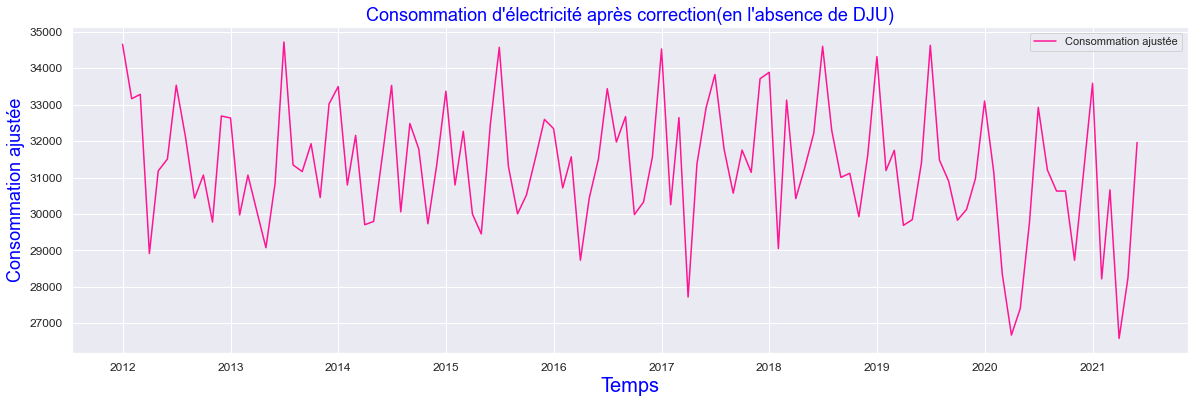

In [50]:
# Figure de la consommation √©lectrique ajust√©e 
sns.set(style = "darkgrid")
plt.figure(figsize = (20,6))

# Variables de la figure

x2 = electricite_chauffage.index
y2 = electricite_chauffage["conso_ajustee"]


plt.plot(x2, y2, color = "deeppink", label = "Consommation ajust√©e")

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© apr√®s correction(en l'absence de DJU)", fontsize = 18, color = "blue")
plt.ylabel("Consommation ajust√©e", fontsize = 18, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

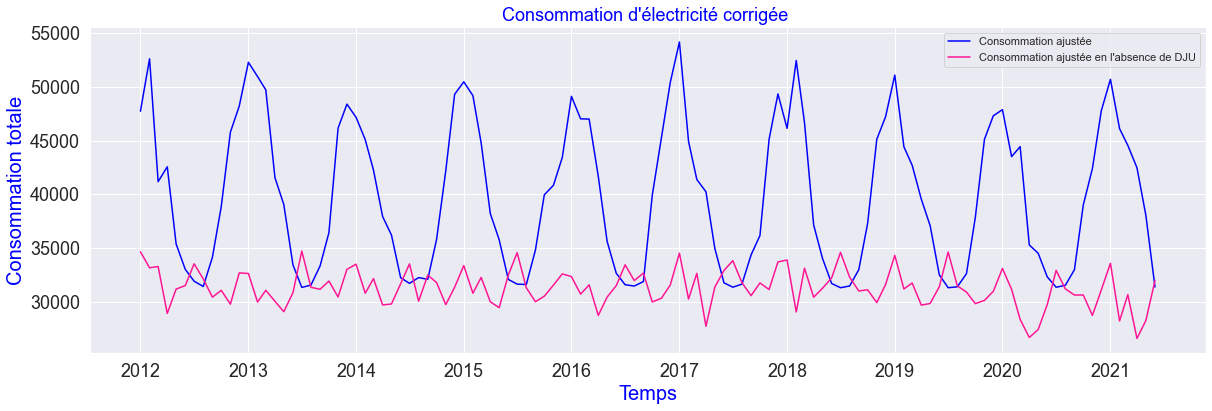

In [51]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,6))

# Variables de la figure
x1 = electricite_chauffage.index
y1 = electricite_chauffage["Conso_ajuste_reg_lineaire"]
x2 = electricite_chauffage.index
y2 = electricite_chauffage["conso_ajustee"]

plt.plot(x1, y1, color = "blue", label = "Consommation ajust√©e")

plt.plot(x2, y2, color = "deeppink", label = "Consommation ajust√©e en l'absence de DJU")

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© corrig√©e ", fontsize = 18, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

# Mission 2

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

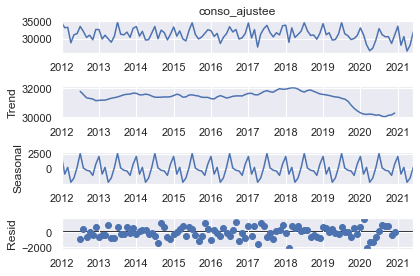

In [53]:
decomp_x = seasonal_decompose( electricite_chauffage["conso_ajustee"],  model='additive')
decomp_x.plot()
plt.show()

In [54]:
#Nous allons cr√©er un dataframe qui contiendra les valeurs de la d√©composition saisoni√®re( valeurs d√©saisonnalis√©es) 
data_seasonal = pd.DataFrame(decomp_x.seasonal)
data_seasonal

seasonal
Mois                   
2012-01-01  2097.860789
2012-02-01  -862.685202
2012-03-01   265.769402
2012-04-01 -2225.502571
2012-05-01 -1511.254040
...                 ...
2021-02-01  -862.685202
2021-03-01   265.769402
2021-04-01 -2225.502571
2021-05-01 -1511.254040
2021-06-01   270.892436

[114 rows x 1 columns]

In [55]:
seasonal = pd.merge(electricite_chauffage, data_seasonal, right_on = "Mois", left_on = "Mois")
seasonal = seasonal.rename(columns = {"seasonal": "valeurs_saisonnieres"})
seasonal

Conso_total_observe    DJU  Conso_ajuste_reg_lineaire  \
Mois                                                                
2012-01-01                51086  336.0               47736.834096   
2012-02-01                54476  435.9               52621.063466   
2012-03-01                43156  201.9               41180.526204   
2012-04-01                40176  230.3               42569.035854   
2012-05-01                35257   83.3               35382.031677   
...                         ...    ...                        ...   
2021-02-01                43024  302.8               46113.646758   
2021-03-01                43913  271.0               44558.907079   
2021-04-01                37747  228.3               42471.253485   
2021-05-01                35007  138.3               38071.046845   
2021-06-01                32032    1.4               31377.843635   

            conso_ajustee  valeurs_saisonnieres  
Mois                                             
2012-01-01   34658.561880           2097.860789  
2012-02-01   33164.332510           -862.685202  
2012-03-01   33284.869772            265.769402  
2012-04-01   28916.360122          -2225.502571  
2012-05-01   31184.364299          -1511.254040  
...                   ...                   ...  
2021-02-01   28219.749218           -862.685202  
2021-03-01   30663.488897            265.769402  
2021-04-01   26585.142491          -2225.502571  
2021-05-01   28245.349131          -1511.254040  
2021-06-01   31963.552341            270.892436  

[114 rows x 5 columns]

Donn√©es corrig√©es des variations saisonni√®res (CVS)

In [56]:
# Nous allons ajouter la colonne valeurs d√©saisonnalis√©es qui s'est affranchit de l'impact saisonier

seasonal["cvs"] = seasonal["conso_ajustee"] - seasonal["valeurs_saisonnieres"] 
#seasonal= seasonal.reset_index()
seasonal.head(12)

Conso_total_observe    DJU  Conso_ajuste_reg_lineaire  \
Mois                                                                
2012-01-01                51086  336.0               47736.834096   
2012-02-01                54476  435.9               52621.063466   
2012-03-01                43156  201.9               41180.526204   
2012-04-01                40176  230.3               42569.035854   
2012-05-01                35257   83.3               35382.031677   
2012-06-01                33219   35.0               33020.587447   
2012-07-01                34141   12.4               31915.646669   
2012-08-01                32247    2.4               31426.734820   
2012-09-01                33269   58.0               34145.084699   
2012-10-01                38628  154.6               38867.973159   
2012-11-01                44260  296.2               45790.964938   
2012-12-01                49602  345.9               48220.856827   

            conso_ajustee  valeurs_saisonnieres           cvs  
Mois                                                           
2012-01-01   34658.561880           2097.860789  32560.701090  
2012-02-01   33164.332510           -862.685202  34027.017711  
2012-03-01   33284.869772            265.769402  33019.100371  
2012-04-01   28916.360122          -2225.502571  31141.862692  
2012-05-01   31184.364299          -1511.254040  32695.618340  
2012-06-01   31507.808529            270.892436  31236.916093  
2012-07-01   33534.749307           2601.019785  30933.729522  
2012-08-01   32129.661156            160.901123  31968.760033  
2012-09-01   30433.311277           -214.642824  30647.954101  
2012-10-01   31069.422817           -330.551011  31399.973828  
2012-11-01   29778.431038          -1067.633000  30846.064038  
2012-12-01   32690.539149            815.825112  31874.714037

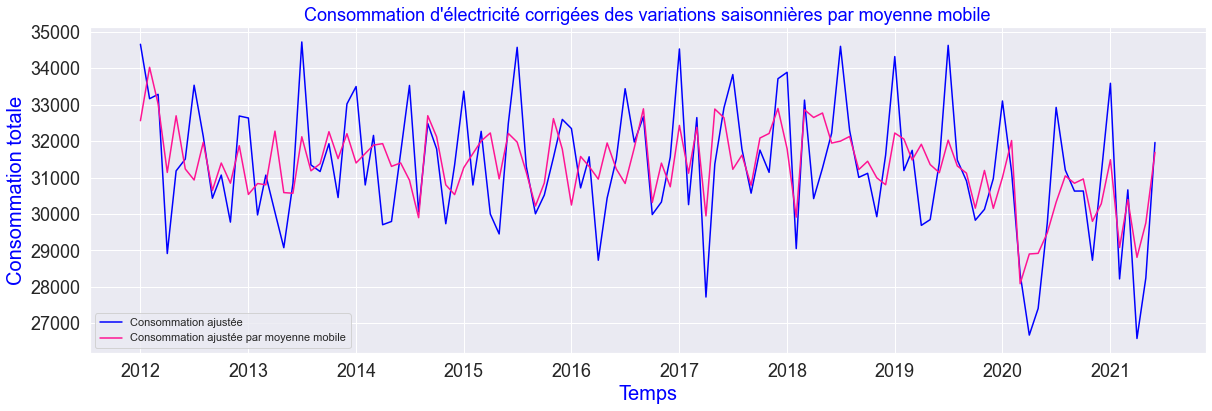

In [57]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,6))

# Variables de la figure
x1 = seasonal.index
y1 = seasonal["conso_ajustee"]
x2 = seasonal.index
y2 = seasonal["cvs"]

plt.plot(x1, y1, color = "blue", label = "Consommation ajust√©e")

plt.plot(x2, y2, color = "deeppink", label = "Consommation ajust√©e par moyenne mobile")

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© corrig√©es des variations saisonni√®res par moyenne mobile", fontsize = 18, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

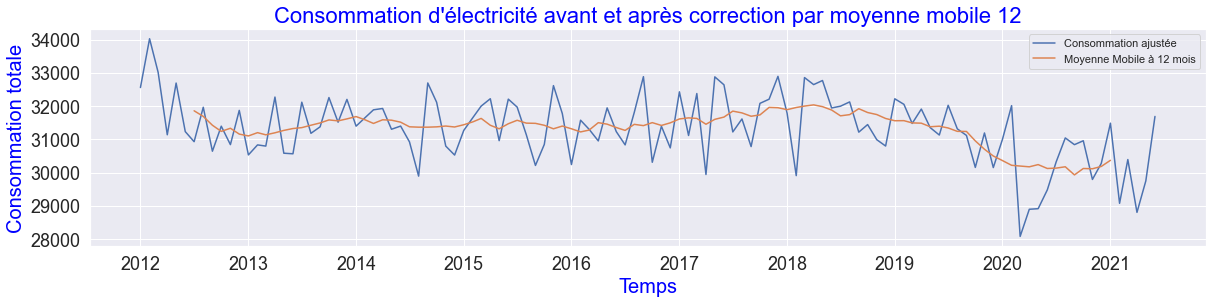

In [58]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,4))


plt.plot(seasonal['cvs'], label='Consommation ajust√©e')
plt.plot(seasonal['cvs'].rolling(12, center=True).mean(), label='Moyenne Mobile √† 12 mois')

# Variables de la figure

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© avant et apr√®s correction par moyenne mobile 12", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

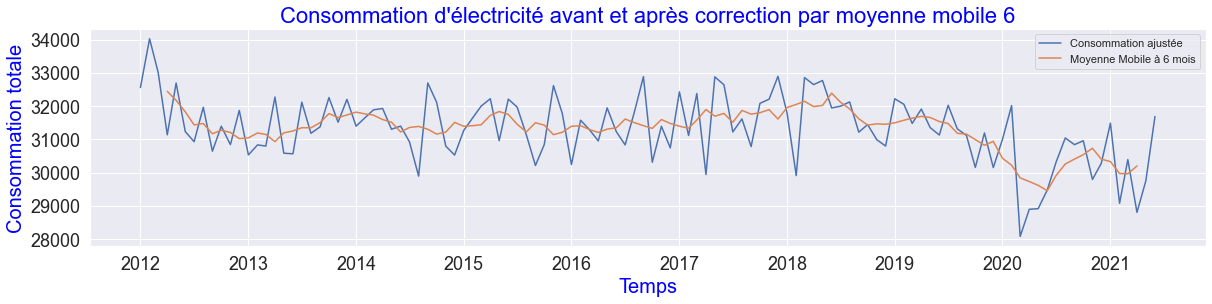

In [59]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,4))


plt.plot(seasonal['cvs'], label='Consommation ajust√©e')
plt.plot(seasonal['cvs'].rolling(6, center=True).mean(), label='Moyenne Mobile √† 6 mois')

# Variables de la figure

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© avant et apr√®s correction par moyenne mobile 6", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

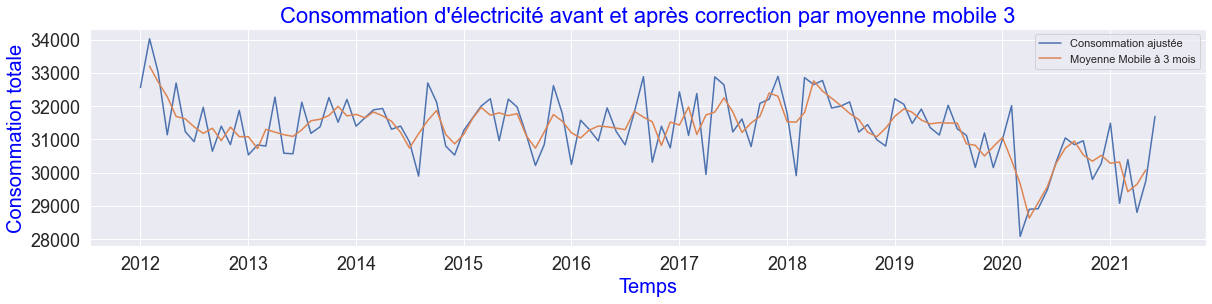

In [60]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,4))


plt.plot(seasonal['cvs'], label='Consommation ajust√©e')
plt.plot(seasonal['cvs'].rolling(3, center=True).mean(), label='Moyenne Mobile √† 3 mois')

# Variables de la figure

# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© avant et apr√®s correction par moyenne mobile 3", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

In [61]:
df_electricite_chauffage = seasonal[["Conso_total_observe", "Conso_ajuste_reg_lineaire",
                                          "conso_ajustee", "cvs"]]
df_electricite_chauffage

Conso_total_observe  Conso_ajuste_reg_lineaire  conso_ajustee  \
Mois                                                                        
2012-01-01                51086               47736.834096   34658.561880   
2012-02-01                54476               52621.063466   33164.332510   
2012-03-01                43156               41180.526204   33284.869772   
2012-04-01                40176               42569.035854   28916.360122   
2012-05-01                35257               35382.031677   31184.364299   
...                         ...                        ...            ...   
2021-02-01                43024               46113.646758   28219.749218   
2021-03-01                43913               44558.907079   30663.488897   
2021-04-01                37747               42471.253485   26585.142491   
2021-05-01                35007               38071.046845   28245.349131   
2021-06-01                32032               31377.843635   31963.552341   

                     cvs  
Mois                      
2012-01-01  32560.701090  
2012-02-01  34027.017711  
2012-03-01  33019.100371  
2012-04-01  31141.862692  
2012-05-01  32695.618340  
...                  ...  
2021-02-01  29082.434419  
2021-03-01  30397.719495  
2021-04-01  28810.645062  
2021-05-01  29756.603171  
2021-06-01  31692.659905  

[114 rows x 4 columns]

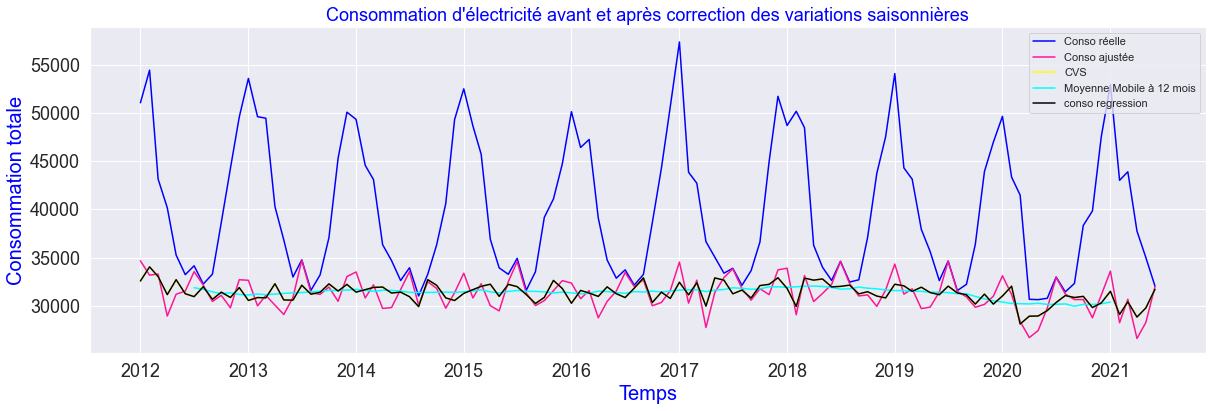

In [62]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,6))

# Variables de la figure
x1 = df_electricite_chauffage.index
y1 = df_electricite_chauffage["Conso_total_observe"]
x2 = df_electricite_chauffage.index
y2 = df_electricite_chauffage["conso_ajustee"]
x3 = df_electricite_chauffage.index
y3 = df_electricite_chauffage["cvs"]
x4 = df_electricite_chauffage.index
y4 = df_electricite_chauffage["cvs"].rolling(12, center=True).mean()
x5 = df_electricite_chauffage.index
y5 = df_electricite_chauffage["cvs"]


plt.plot(x1, y1, color = "blue", label = "Conso r√©elle")
plt.plot(x2, y2, color = "deeppink", label = "Conso ajust√©e")
plt.plot(x3, y3, color = "yellow", label = "CVS")
plt.plot(x4,y4, color = "cyan", label='Moyenne Mobile √† 12 mois')
plt.plot(x5, y5, color = "black", label = "conso regression")


 
# M√©tadonn√©es
plt.title("Consommation d'√©lectricit√© avant et apr√®s correction des variations saisonni√®res", fontsize = 18, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Conso_mensuelle.png")


plt.legend()

# Mission 3

## Pr√©voyez une s√©rie √† l‚Äôaide des m√©thodes de lissage exponentiel: La m√©thode de Holt Winters

Si on souhaite pr√©voir la s√©rie consommation √©lectrique √† l'aide du lissage exponentiel simple, on peut utiliser les commandes suivantes :

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing

In [64]:
y = np.asarray(df_electricite_chauffage["conso_ajustee"])
holt_winter = ExponentialSmoothing(y, seasonal_periods = 12, trend = "add", seasonal = "add").fit()
 
holt_winter_pred = holt_winter.forecast(12) # On utilise ici le forecast sur 12 mois 
                                            #afin de pr√©voir la consommation √©lectrique
                                           # sur cette p√©riode pour l'ann√©e avenir 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Pr√©diction de la pr√©vision sur 12 mois pour l'ann√©e 2022

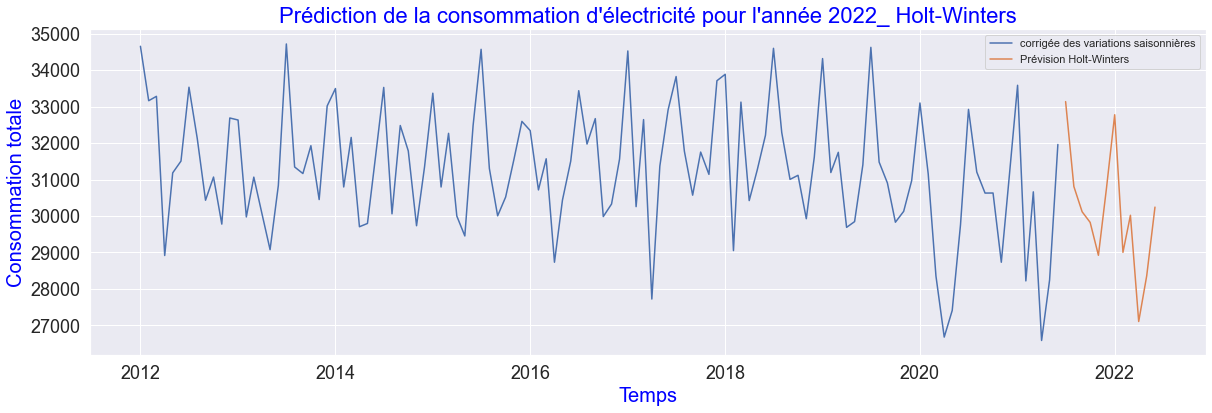

In [65]:
plt.figure(figsize = (20,6))
plt.plot(df_electricite_chauffage["conso_ajustee"], label='corrig√©e des variations saisonni√®res')
plt.plot(pd.date_range(df_electricite_chauffage.index[len(y)-1], periods=12, freq='M'),
                                          holt_winter_pred, label='Pr√©vision Holt-Winters')

# M√©tadonn√©es
plt.title("Pr√©diction de la consommation d'√©lectricit√© pour l'ann√©e 2022_ Holt-Winters", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
plt.savefig("Pr√©vision_2022_Holt_Winters.png")

plt.legend()
plt.show()

### Analyse a posteriori

In [66]:
df_electricite_chauffage

Conso_total_observe  Conso_ajuste_reg_lineaire  conso_ajustee  \
Mois                                                                        
2012-01-01                51086               47736.834096   34658.561880   
2012-02-01                54476               52621.063466   33164.332510   
2012-03-01                43156               41180.526204   33284.869772   
2012-04-01                40176               42569.035854   28916.360122   
2012-05-01                35257               35382.031677   31184.364299   
...                         ...                        ...            ...   
2021-02-01                43024               46113.646758   28219.749218   
2021-03-01                43913               44558.907079   30663.488897   
2021-04-01                37747               42471.253485   26585.142491   
2021-05-01                35007               38071.046845   28245.349131   
2021-06-01                32032               31377.843635   31963.552341   

                     cvs  
Mois                      
2012-01-01  32560.701090  
2012-02-01  34027.017711  
2012-03-01  33019.100371  
2012-04-01  31141.862692  
2012-05-01  32695.618340  
...                  ...  
2021-02-01  29082.434419  
2021-03-01  30397.719495  
2021-04-01  28810.645062  
2021-05-01  29756.603171  
2021-06-01  31692.659905  

[114 rows x 4 columns]

In [67]:
# Troncature du dataset qui va de l'ann√©e 2021 √† l'ann√©e 2021
x_tronc = df_electricite_chauffage['2017':]
# l'ann√©e √† pr√©voir 2020
x_a_prevoir = df_electricite_chauffage['2020']

<ipython-input-67-6eb14828886d>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_a_prevoir = df_electricite_chauffage['2020']


In [68]:
y_x_tronc= x_tronc['conso_ajustee']
holt_winter2 = ExponentialSmoothing(y_x_tronc, seasonal_periods = 12, trend = "add", seasonal = "add").fit()
holt_winter_pred2 = holt_winter2.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


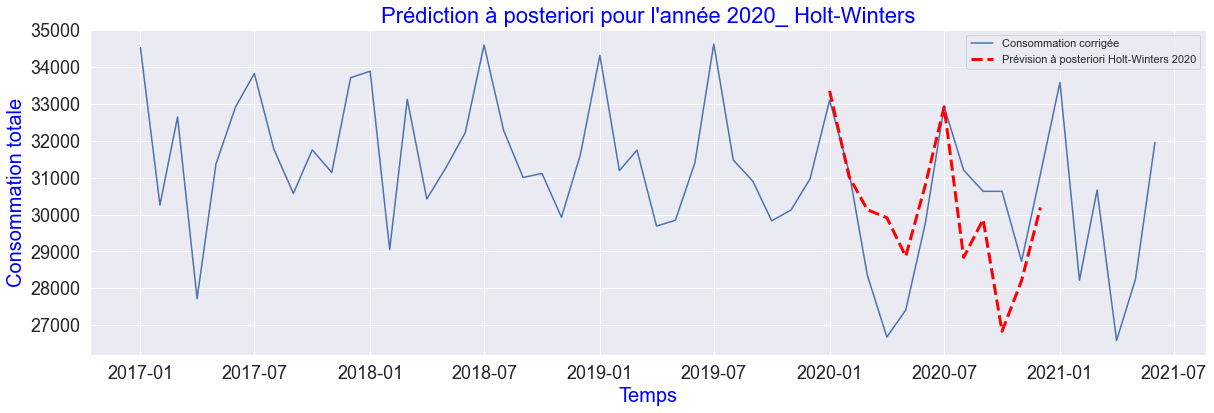

In [69]:
plt.figure(figsize = (20,6))
plt.plot(x_tronc["conso_ajustee"], label='Consommation corrig√©e')
plt.plot(x_a_prevoir.index, holt_winter_pred2, color = 'red', 
         label =  'Pr√©vision √† posteriori Holt-Winters 2020', linestyle = 'dashed', lw = 3)

# M√©tadonn√©es
plt.title("Pr√©diction √† posteriori pour l'ann√©e 2020_ Holt-Winters", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
plt.savefig("a_posteriori_2020_Holt_Winters.png")


plt.legend()
plt.show()

 Nous allons faire une zoom sur l'ann√©e 2020

In [70]:
zoom_x_tronc = df_electricite_chauffage['2020']

<ipython-input-70-ce665ded90cd>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  zoom_x_tronc = df_electricite_chauffage['2020']


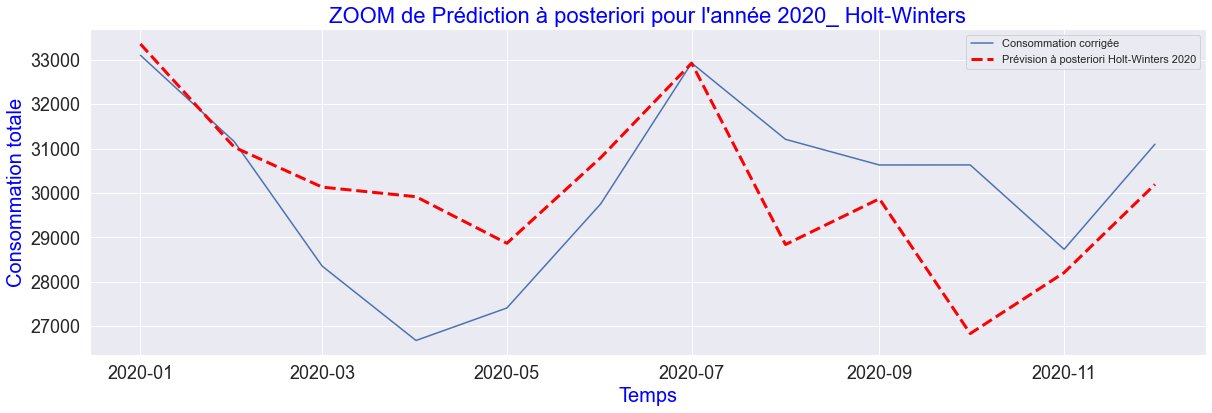

In [71]:
plt.figure(figsize = (20,6))
plt.plot(zoom_x_tronc['conso_ajustee'] , label='Consommation corrig√©e')
plt.plot(x_a_prevoir.index, holt_winter_pred2, color = 'red', 
         label =  'Pr√©vision √† posteriori Holt-Winters 2020', linestyle = 'dashed', lw = 3)

# M√©tadonn√©es
plt.title("ZOOM de Pr√©diction √† posteriori pour l'ann√©e 2020_ Holt-Winters", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
plt.savefig("a_posteriori_2020_Holt_Winters.png")


plt.legend()
plt.show()

### Evaluation du mod√®le 

https://www.aspexit.com/comment-valider-un-modele-de-prediction/

#### l'Erreur quadratique moyenne (RMSE )

In [72]:
rmse = round(np.sqrt(((x_a_prevoir['conso_ajustee']-holt_winter_pred)**2).mean()),2)
rmse

1707.05

####  l'erreur relative absolue moyenne MAPE (Mean Average Percentage Error)

In [73]:
mape=(np.abs(1-holt_winter_pred/x_a_prevoir['conso_ajustee'])).mean()*100
mape

4.429423031881796

### Pr√©vision sur 24 Mois 

In [74]:
# l'ann√©e √† pr√©voir 2019_2020
x_tronc2 = df_electricite_chauffage['2019':'2020']


In [75]:
holt_winter2 = ExponentialSmoothing(y_x_tronc, seasonal_periods = 24, trend = "add", seasonal = "add").fit()
holt_winter_pred2 = holt_winter2.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


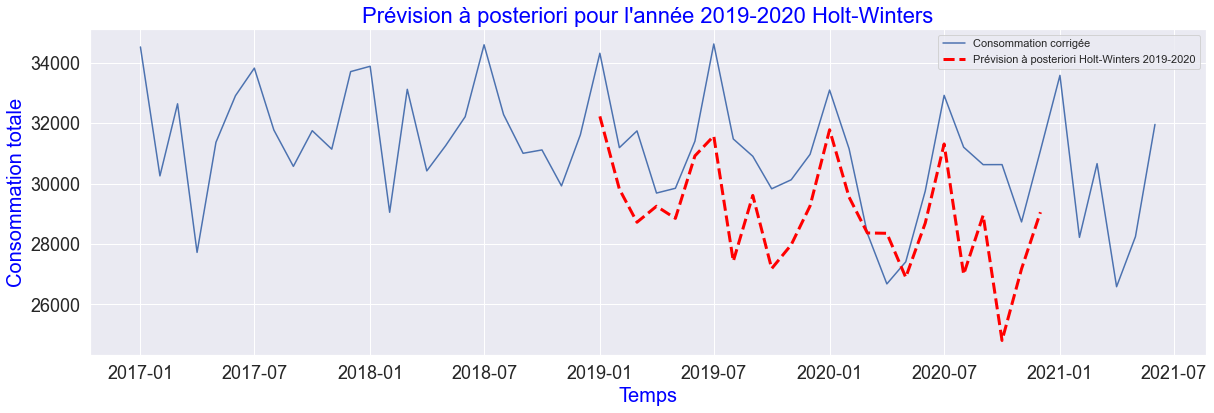

In [76]:
plt.figure(figsize = (20,6))
plt.plot(x_tronc["conso_ajustee"], label='Consommation corrig√©e')
plt.plot(x_tronc2.index, holt_winter_pred2, color = 'red', 
         label =  'Pr√©vision √† posteriori Holt-Winters 2019-2020', linestyle = 'dashed', lw = 3)

# M√©tadonn√©es
plt.title("Pr√©vision √† posteriori pour l'ann√©e 2019-2020 Holt-Winters", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
plt.savefig("a_posteriori_2020_Holt_Winters.png")


plt.legend()
plt.show()

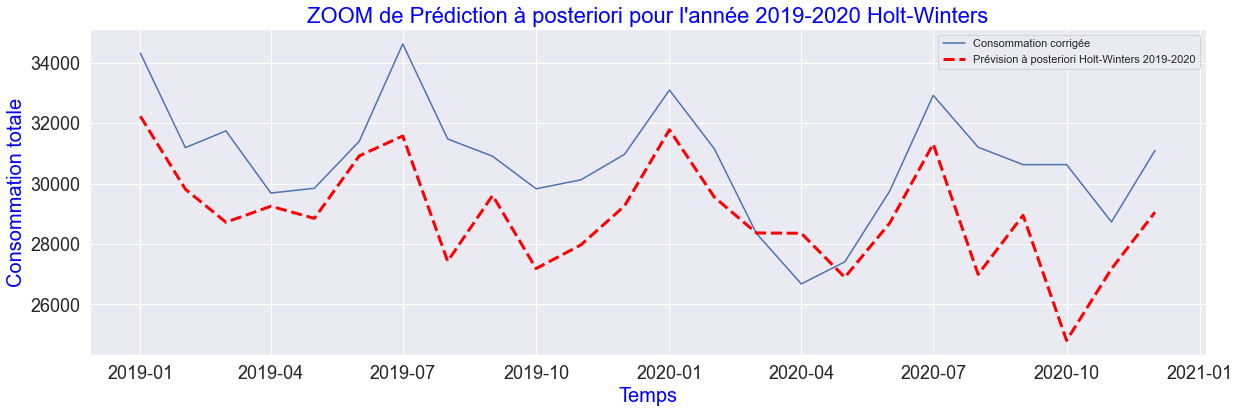

In [77]:
plt.figure(figsize = (20,6))
plt.plot(x_tronc2['conso_ajustee'] , label='Consommation corrig√©e')
plt.plot(x_tronc2.index, holt_winter_pred2, color = 'red', 
         label =  'Pr√©vision √† posteriori Holt-Winters 2019-2020', linestyle = 'dashed', lw = 3)

# M√©tadonn√©es
plt.title("ZOOM de Pr√©diction √† posteriori pour l'ann√©e 2019-2020 Holt-Winters", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
plt.savefig("a_posteriori_2020_Holt_Winters.png")


plt.legend()
plt.show()

## Pr√©voyez une s√©rie temporelle √† l‚Äôaide des m√©thodes SARIMA

In [78]:
sarima = pd.read_csv(r"C:\Users\Utilisateur\projet 9\sarima.csv", parse_dates=['Mois'])
df_sarima = sarima[["Mois", "conso_ajustee"]]
df_sarima

Mois  conso_ajustee
0   2012-01-01   34658.561880
1   2012-02-01   33164.332510
2   2012-03-01   33284.869772
3   2012-04-01   28916.360122
4   2012-05-01   31184.364299
..         ...            ...
109 2021-02-01   28219.749218
110 2021-03-01   30663.488897
111 2021-04-01   26585.142491
112 2021-05-01   28245.349131
113 2021-06-01   31963.552341

[114 rows x 2 columns]

### Test si la s√©rie est stationnaire

In [79]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [80]:
result = adfuller(df_sarima.conso_ajustee.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.704448
p-value: 0.845594


 ### Comment trouver l'ordre de diff√©renciation (d)¬∂

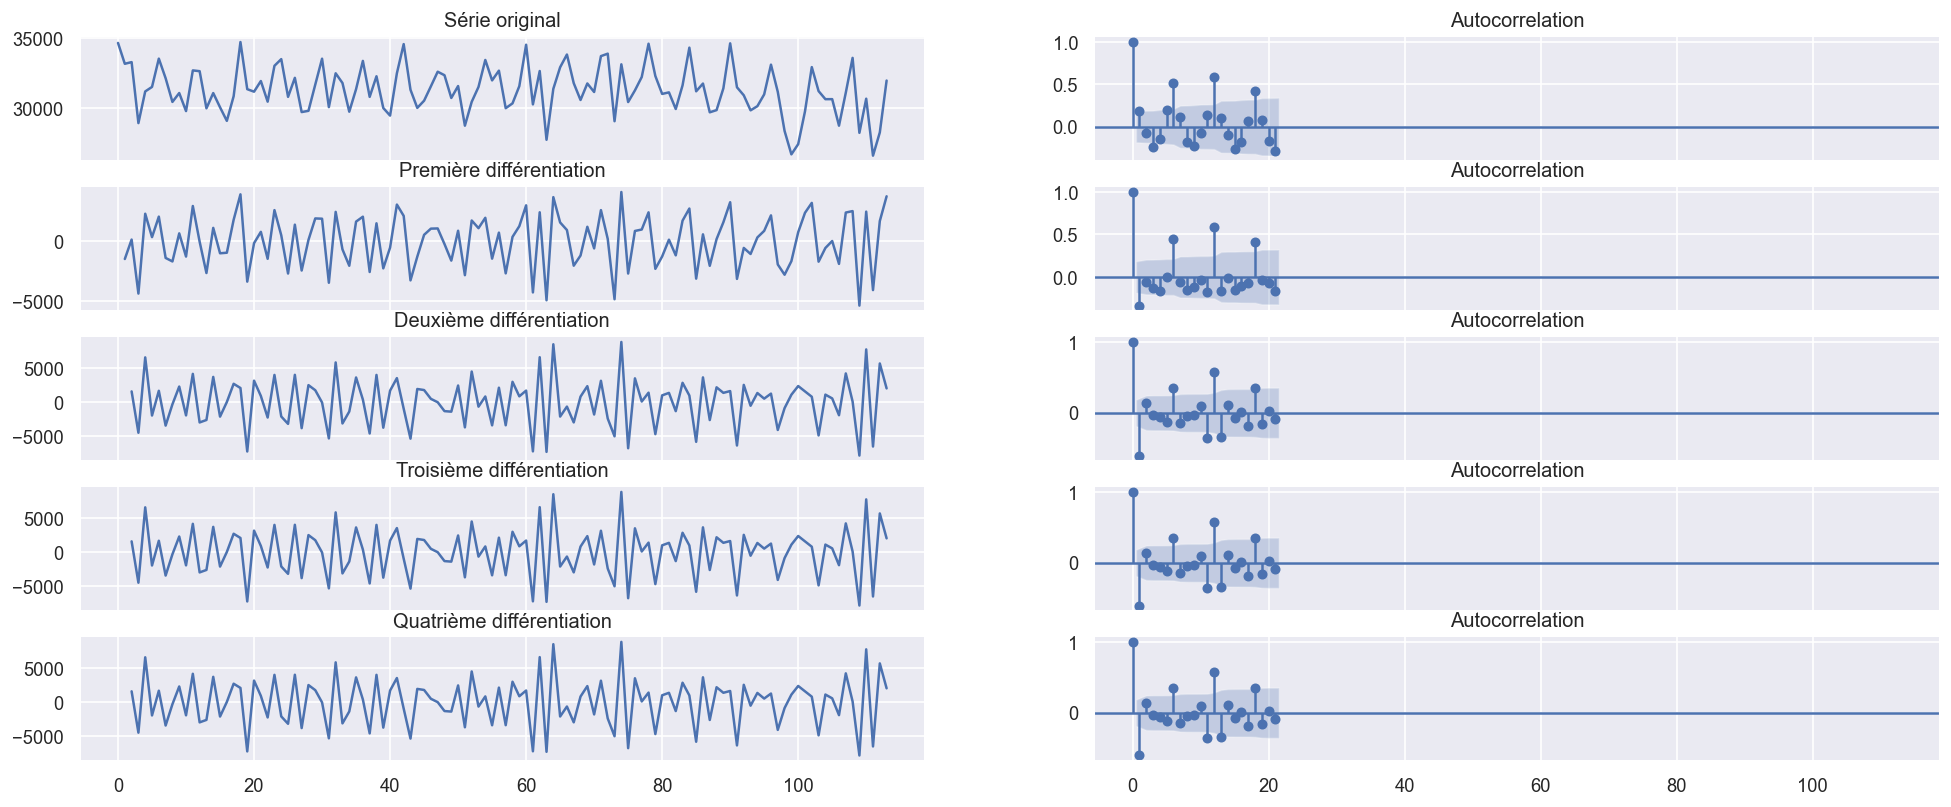

In [81]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':120})


# S√©rie original
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(df_sarima.conso_ajustee); axes[0, 0].set_title('S√©rie original')
plot_acf(df_sarima.conso_ajustee, ax=axes[0, 1])

# Premi√®re diff√©rentiation
axes[1, 0].plot(df_sarima.conso_ajustee.diff()); axes[1, 0].set_title('Premi√®re diff√©rentiation')
plot_acf(df_sarima.conso_ajustee.diff().dropna(), ax=axes[1, 1])

# Deuxi√®me diff√©rentiation
axes[2, 0].plot(df_sarima.conso_ajustee.diff().diff()); axes[2, 0].set_title('Deuxi√®me diff√©rentiation')
plot_acf(df_sarima.conso_ajustee.diff().diff().dropna(), ax=axes[2, 1])

# Troisi√®me diff√©rentiation
axes[3, 0].plot(df_sarima.conso_ajustee.diff().diff()); axes[3, 0].set_title('Troisi√®me diff√©rentiation')
plot_acf(df_sarima.conso_ajustee.diff().diff().dropna(), ax=axes[3, 1])

# Quatri√®me  diff√©rentiation
axes[4, 0].plot(df_sarima.conso_ajustee.diff().diff()); axes[4, 0].set_title('Quatri√®me diff√©rentiation')
plot_acf(df_sarima.conso_ajustee.diff().diff().dropna(), ax=axes[4, 1])


plt.show()

### Comment trouver l'ordre du terme AR (p)

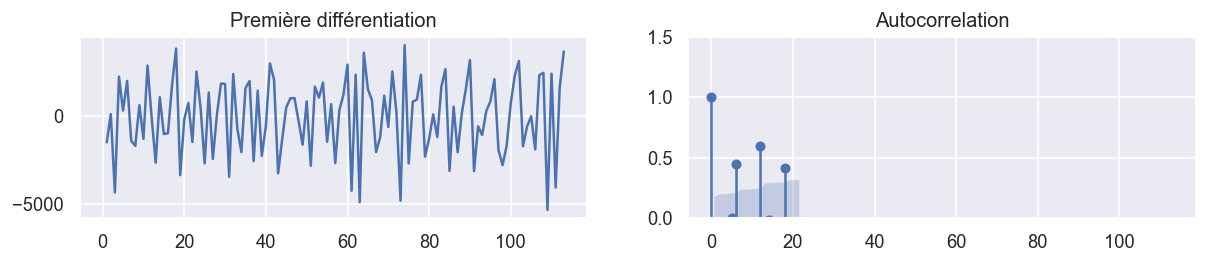

In [82]:
# PACF plot Premi√®re diff√©rentiation
plt.rcParams.update({'figure.figsize':(12,2), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_sarima.conso_ajustee.diff()); axes[0].set_title('Premi√®re diff√©rentiation')
axes[1].set(ylim=(0,1.5))
plot_acf(df_sarima.conso_ajustee.diff().dropna(), ax=axes[1])

plt.show()

### Comment trouver l'ordre du terme MA (q)¬∂

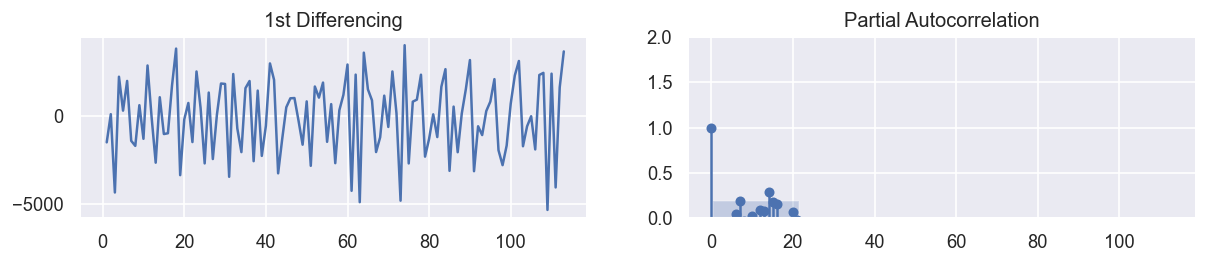

In [83]:
# ACF plot Premi√®re diff√©rentiation
plt.rcParams.update({'figure.figsize':(12,2), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_sarima.conso_ajustee.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,2))
plot_pacf(df_sarima.conso_ajustee.diff().dropna(), ax=axes[1])

plt.show()

### Construire le mod√®le SARIMA 

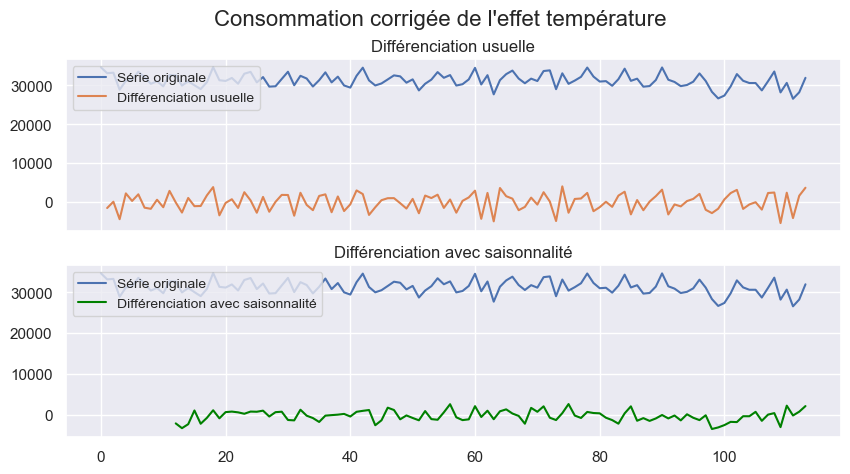

In [84]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# S√©rie diff√©renci√©e une fois
axes[0].plot(df_sarima.conso_ajustee[:], label='S√©rie originale')
axes[0].plot(df_sarima.conso_ajustee[:].diff(1), label='Diff√©renciation usuelle')
axes[0].set_title('Diff√©renciation usuelle')
axes[0].legend(loc='upper left', fontsize=10)


# S√©rie diff√©renci√©e douze fois
axes[1].plot(df_sarima.conso_ajustee[:], label='S√©rie originale')
axes[1].plot(df_sarima.conso_ajustee[:].diff(12), label='Diff√©renciation avec saisonnalit√©', color='green')
axes[1].set_title('Diff√©renciation avec saisonnalit√©')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle("Consommation corrig√©e de l'effet temp√©rature", fontsize=16)
plt.show()

In [85]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_sarima.conso_ajustee, start_p=1, start_q=1,
                         test='adf',
                         max_p=1, max_q=1, m=12,
                         start_P=1, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1765.279, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1760.657, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1761.677, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1761.762, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1760.418, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1759.998, Time=0.07 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1761.904, Time=0.15 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1761.851, Time=0.20 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1760.076, Time=0.07 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1761.744, Time=0.07 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1763.281, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=1759.634, Time=0.03 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=1761.615, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  114
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -877.160
Date:                    Mon, 07 Feb 2022   AIC                           1758.320
Time:                            16:41:49   BIC                           1763.570
Sample:                                 0   HQIC                          1760.446
                                    - 114                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0397      0.016     -2.476      0.013      -0.071      -0.008
sigma2       1.62e+06   2.38e+05      6.807      0.000    1.15e+06    2.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.10   Prob(JB):                         0.64
Heteroskedasticity (H):               1.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Mod√®le 1

On estime en premier lieu un mod√®le  ùëÜùê¥ùëÖùêºùëÄùê¥(1,1,1)(1,1,1)12  au vu des autocorr√©logrammes empiriques simples et partiels. Ce mod√®le s‚Äô√©crit :

(ùêº‚àíœÜ1ùêµ)(ùêº‚àíœÜ‚Ä≤1ùêµ12)(ùêº‚àíùêµ)(ùêº‚àíùêµ12)ùëôùëõ(ùëãùë°)=(ùêº+Œ∏1ùêµ)(ùêº+Œ∏‚Ä≤1ùêµ12)Œµùë°

In [86]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox
#order=(1,1,1), seasonal_order=(1,1,1,12))
model1 = SARIMAX((y), order=(1,1,1), seasonal_order=(0,1,1,12))
results1 = model1.fit()
print(results1.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -885.455
Date:                            Mon, 07 Feb 2022   AIC                           1778.910
Time:                                    16:41:49   BIC                           1789.371
Sample:                                         0   HQIC                          1783.145
                                            - 114                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4282      0.125      3.437      0.001       0.184       0.672
ma.L1         -0.6322      0.125   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [87]:
from scipy.stats import shapiro

shapiro(results1.resid)

ShapiroResult(statistic=0.4606932997703552, pvalue=1.3094577221492604e-18)

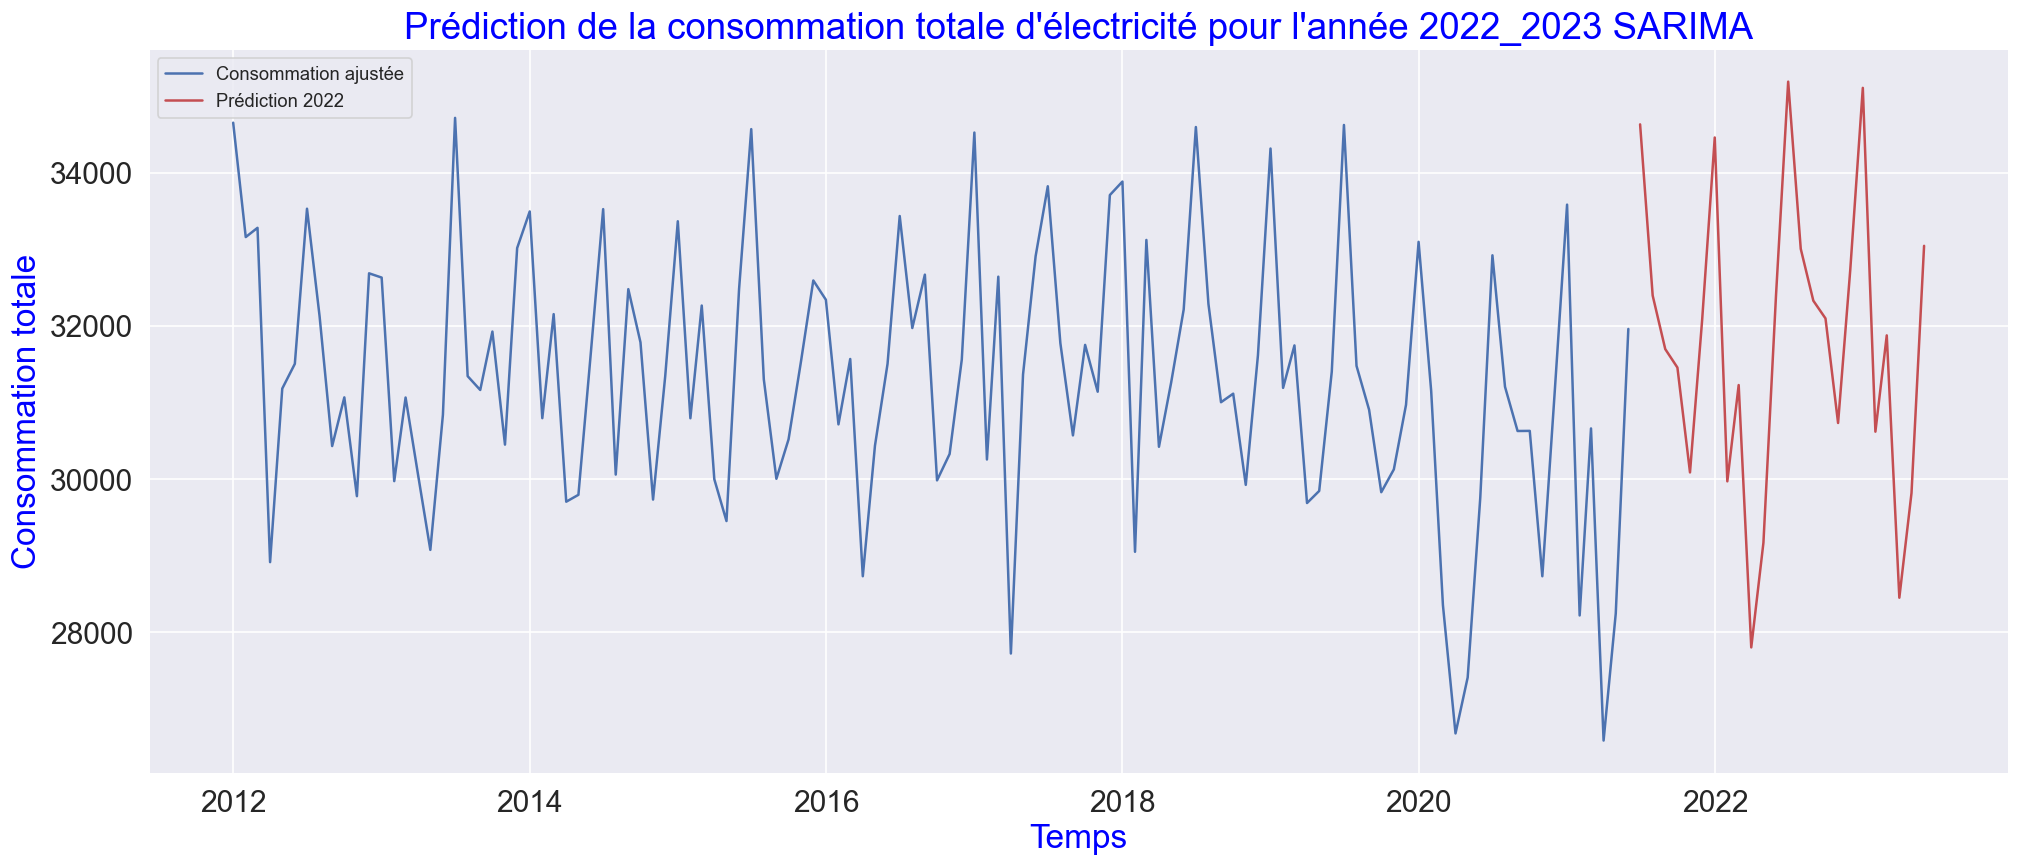

In [88]:

ysarima = df_sarima
ysarima.set_index("Mois", inplace = True)
ysarima

pred_model1 = results1.get_forecast(24)
pred = pred_model1.predicted_mean


plt.figure(figsize=(20,8))
plt.plot(ysarima, label='Consommation ajust√©e')
plt.plot(pd.date_range(ysarima.index[len(ysarima)-1], periods=24, freq='M'), pred, color='r', label='Pr√©diction 2022')

# M√©tadonn√©es
plt.title("Pr√©diction de la consommation totale d'√©lectricit√© pour l'ann√©e 2022_2023 SARIMA", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("Pr√©vision_2022_SARIMA.png")


plt.legend()
plt.show()

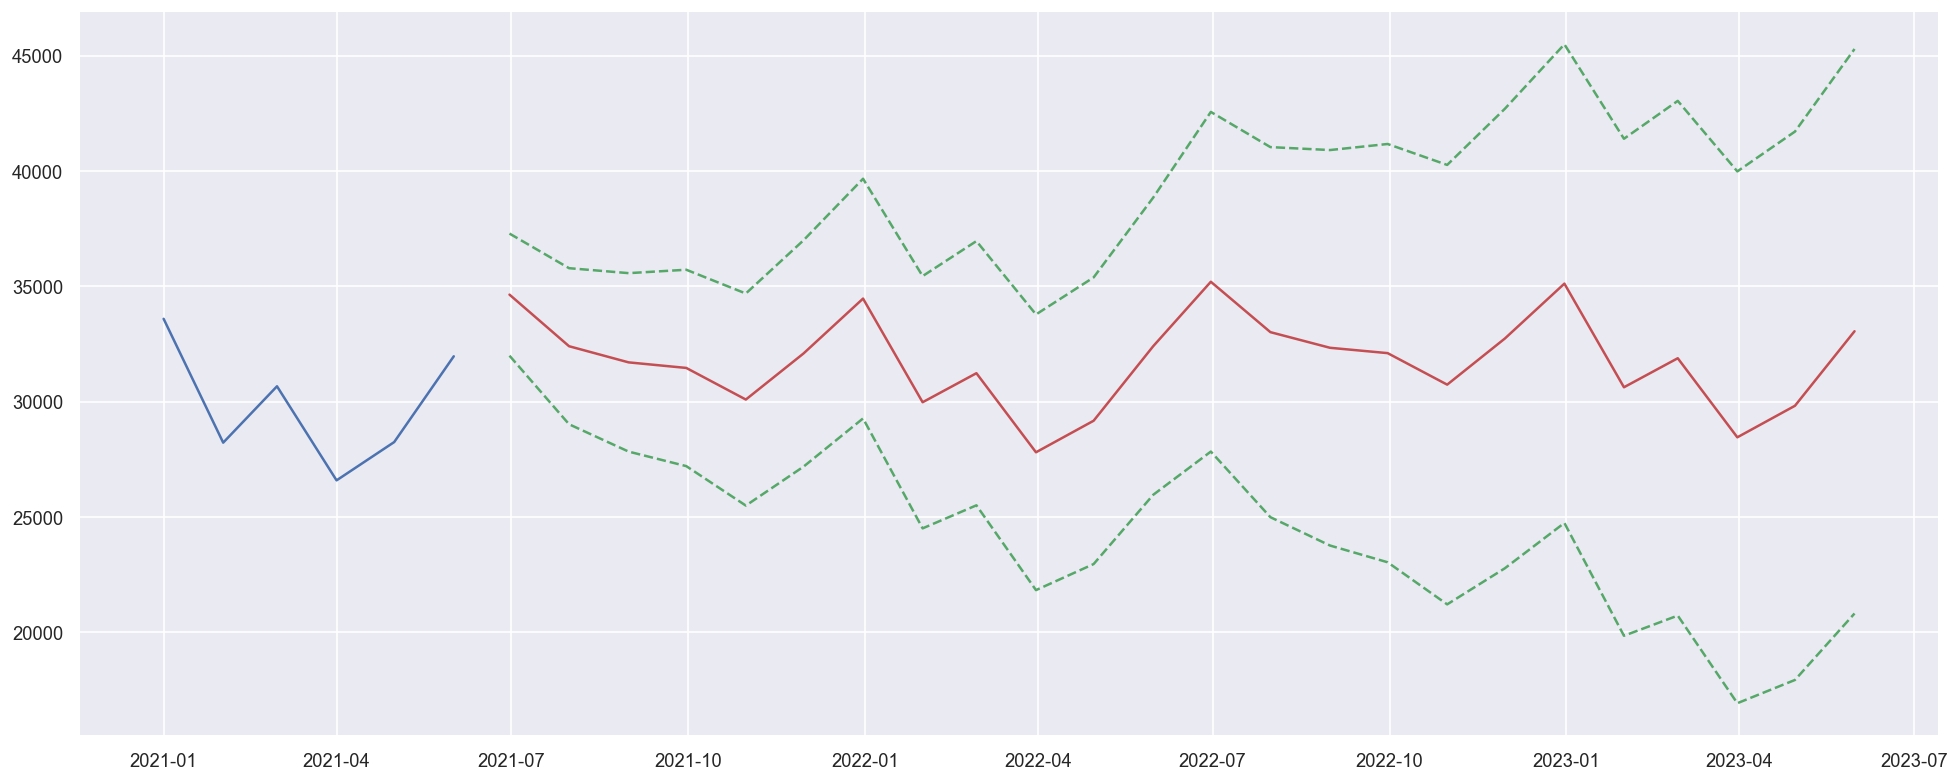

In [89]:
# Avec intervalles de confiance sur la pr√©vision √† 12 mois
pred_model = results1.get_forecast(24)
pred = pred_model.predicted_mean

pred_l = [(elt[0]) for elt in pred_model.conf_int(alpha=0.05)]
pred_u = [(elt[1]) for elt in pred_model.conf_int(alpha=0.05)]

plt.figure(figsize=(20,8))
plt.plot(df_electricite_chauffage["conso_ajustee"]['2021':]  , label='Consommation ajust√©e')
plt.plot(pd.date_range(df_electricite_chauffage.index[len(df_electricite_chauffage)-1], periods=24, freq='M'), pred, color='r', label='Pr√©vision SARIMA')
plt.plot(pd.date_range(df_electricite_chauffage.index[len(df_electricite_chauffage)-1], periods=24, freq='M'), 
         pred_l, color='g', linestyle='--', label='int95%_inf')
plt.plot(pd.date_range(df_electricite_chauffage.index[len(df_electricite_chauffage)-1], periods=24, freq='M'), 
         pred_u, color='g', linestyle='--', label='int95%_sup')


plt.show() 

 #### Analyse a posteriori

In [90]:
# Troncature du dataset qui va de l'ann√©e 2021 √† l'ann√©e 2021
x_tronc = ysarima['2017':]
# l'ann√©e √† pr√©voir 2020
x_a_prevoir = x_tronc['conso_ajustee']['2020']

In [91]:
#order=(0,1,1), seasonal_order=(1,0,1,12))
model3tronc = SARIMAX(np.asarray(x_tronc['conso_ajustee']), order=(1,1,1), seasonal_order=(0,1,1,12))
results3tronc = model3tronc.fit()
print(results3tronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results3tronc.resid, lags=elt)[1].mean()))
    
shapiro(results3tronc.resid)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -360.144
Date:                            Mon, 07 Feb 2022   AIC                            728.288
Time:                                    16:41:50   BIC                            735.142
Sample:                                         0   HQIC                           730.784
                                             - 54                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4061      0.565      0.719      0.472      -0.701       1.513
ma.L1         -0.5025      0.564   

ShapiroResult(statistic=0.5008686780929565, pvalue=2.767379858256702e-12)

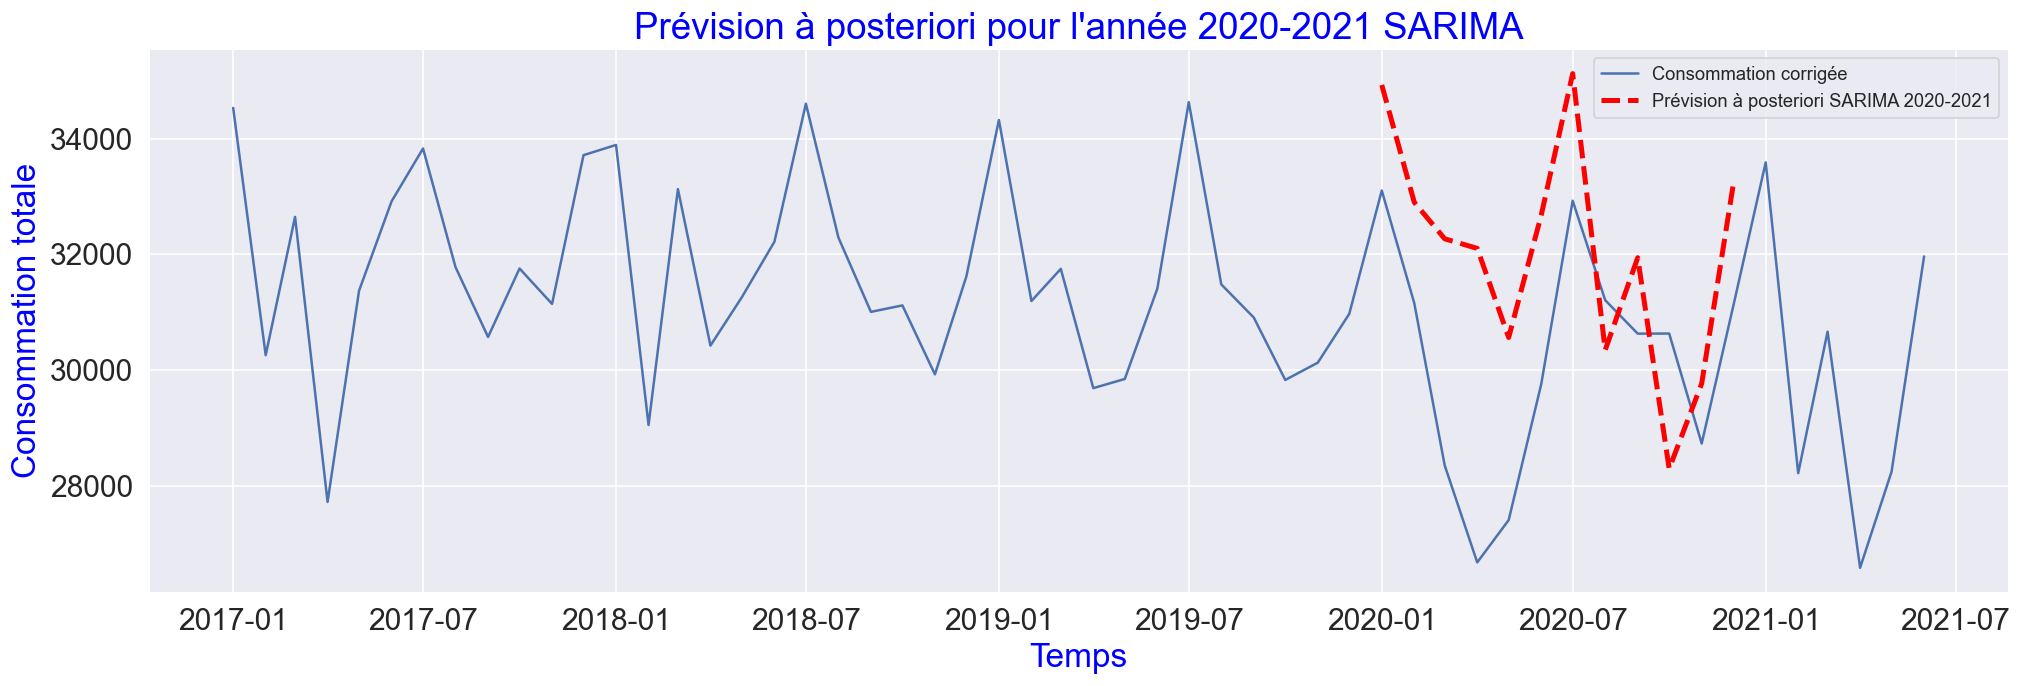

In [92]:
pred_model3tronc = results3tronc.get_forecast(12)
pred_tronc = pred_model3tronc.predicted_mean

plt.figure(figsize = (20,6))
plt.plot(x_tronc["conso_ajustee"], label='Consommation corrig√©e')
plt.plot(x_a_prevoir.index, pred_tronc, color = 'red', 
         label =  'Pr√©vision √† posteriori SARIMA 2020-2021', linestyle = 'dashed', lw = 3)

# M√©tadonn√©es
plt.title("Pr√©vision √† posteriori pour l'ann√©e 2020-2021 SARIMA", fontsize = 22, color = "blue")
plt.ylabel("Consommation totale", fontsize = 20, color = "blue")
plt.xlabel("Temps", fontsize = 20, color = "blue")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# Sauvegarder la figure 
#plt.savefig("a_posteriori_2020_sarima.png")


plt.legend()
plt.show()

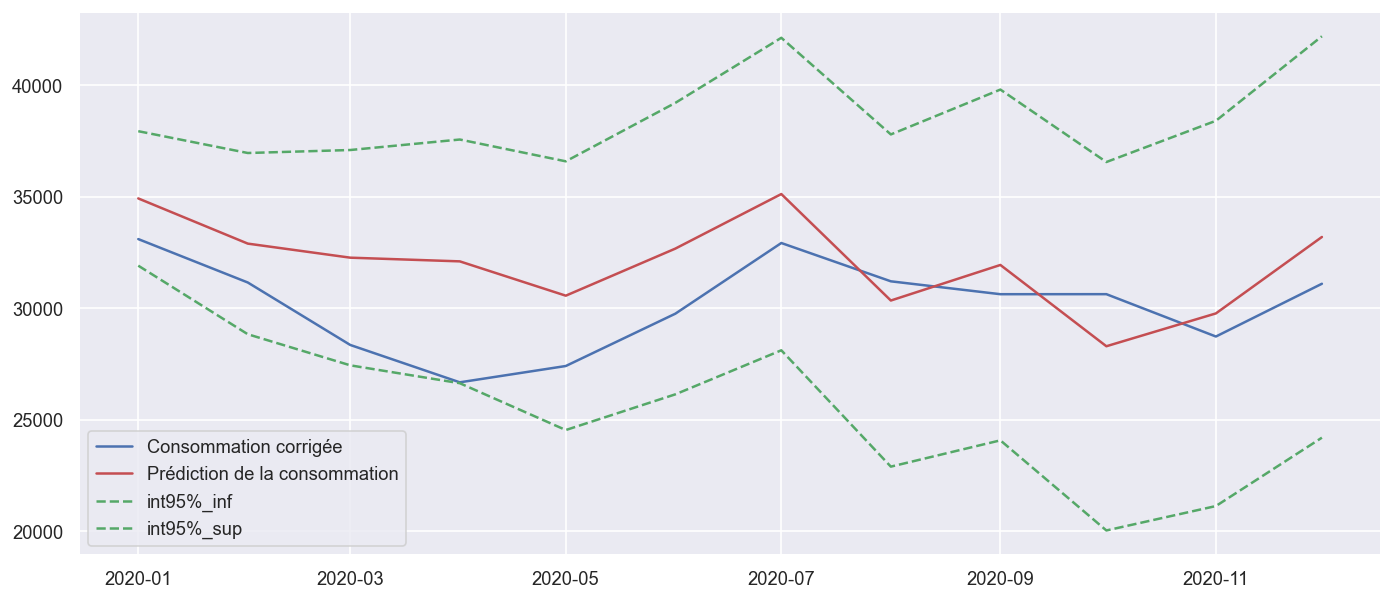

In [93]:
pred_model3tronc = results3tronc.get_forecast(12)
pred_tronc = pred_model3tronc.predicted_mean
pred_l_tronc = [(elt[0]) for elt in pred_model3tronc.conf_int(alpha=0.05)]
pred_u_tronc = [(elt[1]) for elt in pred_model3tronc.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir, label='Consommation corrig√©e')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Pr√©diction de la consommation')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--', label='int95%_inf')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--', label='int95%_sup')
plt.legend()
plt.show()

In [94]:
x_a_prevoir

Mois
2020-01-01    33101.888325
2020-02-01    31154.760253
2020-03-01    28353.827741
2020-04-01    26678.257551
2020-05-01    27409.849153
2020-06-01    29755.841591
2020-07-01    32925.997934
2020-08-01    31207.989668
2020-09-01    30630.032359
2020-10-01    30631.638381
2020-11-01    28731.922795
2020-12-01    31098.448932
Name: conso_ajustee, dtype: float64

In [95]:
mape=(np.abs(1-pred_tronc/x_tronc['conso_ajustee']['2020'])).mean()*100
mape

8.187383629252977

In [96]:
#!pip3 install pyramid-arima